In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns

from bs4 import BeautifulSoup
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

# INTRODUCTION

This notebook explores player performance data from the 2023-2024 NBA regular season to identify and define modern player archetypes. Using statistical analysis and machine learning techniques, we aim to move beyond traditional basketball positions and uncover patterns that reflect the evolving roles in today’s game. 

**Project Overview:**

1) <u>Data Preparation</u> – Cleaning and preprocessing the dataset to ensure accuracy and usability.

2) <u>Exploratory Data Analysis (EDA)</u> – Visualizing and analyzing player statistics to identify key trends and features.

3) <u>Clustering Analysis</u> – Grouping players into archetypes using machine learning methods.

4) <u>Conclusions and Insights</u> – Summarizing findings and discussing their implications for team strategy.

Using these insights along with the gathered datasets covering the regular season, the playoffs, and the salaries of all players in the league, a 15-player team will be constructed according to archetypes and models defined.

# Regular season stats dataset

__Preprocessing:__ 
Before perfoming a deep dive into the data, we'll begin by taking a look at our initial data sets to assess where to start preprocessing.  Here we'll check the broad metrics of the original dataframe for the 2023-2024 NBA regular season, looking for any duplicate or missing values that need handling.

In [2]:
reg_df = pd.read_csv('2023-2024 NBA Player Stats - Regular.csv', sep=';', encoding='latin-1')

reg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      735 non-null    int64  
 1   Player  735 non-null    object 
 2   Pos     735 non-null    object 
 3   Age     735 non-null    int64  
 4   Tm      735 non-null    object 
 5   G       735 non-null    int64  
 6   GS      735 non-null    int64  
 7   MP      735 non-null    float64
 8   FG      735 non-null    float64
 9   FGA     735 non-null    float64
 10  FG%     735 non-null    float64
 11  3P      735 non-null    float64
 12  3PA     735 non-null    float64
 13  3P%     735 non-null    float64
 14  2P      735 non-null    float64
 15  2PA     735 non-null    float64
 16  2P%     735 non-null    float64
 17  eFG%    735 non-null    float64
 18  FT      735 non-null    float64
 19  FTA     735 non-null    float64
 20  FT%     735 non-null    float64
 21  ORB     735 non-null    float64
 22  DR

In [3]:
# Be sure to update the file path below to the local directory where this project is being viewed
file_path = '/Users/18604/Desktop/Data Science Projects/NBA-Archetypes/2023-2024 NBA Player Stats - Regular.csv'
reg_stats = pd.read_csv(file_path, delimiter=';', encoding='ISO-8859-1')

In [4]:
reg_stats

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,...,0.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6
1,1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,...,0.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
2,1,Precious Achiuwa,PF,24,NYK,49,18,24.2,3.2,6.1,...,0.643,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6
3,2,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,...,0.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3
4,3,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,...,0.661,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,568,Thaddeus Young,PF,35,PHO,10,0,8.9,1.1,2.1,...,0.333,1.7,1.1,2.8,0.7,0.5,0.2,0.4,1.1,2.3
731,569,Trae Young,PG,25,ATL,54,54,36.0,8.0,18.7,...,0.855,0.4,2.3,2.8,10.8,1.3,0.2,4.4,2.0,25.7
732,570,Omer Yurtseven,C,25,UTA,48,12,11.4,2.1,3.8,...,0.679,1.5,2.8,4.3,0.6,0.2,0.4,0.8,1.1,4.6
733,571,Cody Zeller,C,31,NOP,43,0,7.4,0.6,1.4,...,0.605,1.1,1.5,2.6,0.9,0.2,0.1,0.4,1.0,1.8


In [5]:
reg_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      735 non-null    int64  
 1   Player  735 non-null    object 
 2   Pos     735 non-null    object 
 3   Age     735 non-null    int64  
 4   Tm      735 non-null    object 
 5   G       735 non-null    int64  
 6   GS      735 non-null    int64  
 7   MP      735 non-null    float64
 8   FG      735 non-null    float64
 9   FGA     735 non-null    float64
 10  FG%     735 non-null    float64
 11  3P      735 non-null    float64
 12  3PA     735 non-null    float64
 13  3P%     735 non-null    float64
 14  2P      735 non-null    float64
 15  2PA     735 non-null    float64
 16  2P%     735 non-null    float64
 17  eFG%    735 non-null    float64
 18  FT      735 non-null    float64
 19  FTA     735 non-null    float64
 20  FT%     735 non-null    float64
 21  ORB     735 non-null    float64
 22  DR

In [6]:
reg_stats.isnull().sum()

Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

In [7]:
reg_stats.duplicated().sum()

0

There appear to be no duplicate or missing values in the original dataframe.

# Playoffs stats dataset

Similar to the original data set, we'll take a look at the 2023-24 playoff data as well. It serves as a condensed sample of performance among the leagues top performing teams, and may aid in the selection of our final dream team participants.

In [8]:
stats = pd.read_csv('2023-2024 NBA Player Stats - Playoffs.csv')

In [9]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 1 columns):
 #   Column                                                                                                            Non-Null Count  Dtype 
---  ------                                                                                                            --------------  ----- 
 0   Rk;Player;Pos;Age;Tm;G;GS;MP;FG;FGA;FG%;3P;3PA;3P%;2P;2PA;2P%;eFG%;FT;FTA;FT%;ORB;DRB;TRB;AST;STL;BLK;TOV;PF;PTS  214 non-null    object
dtypes: object(1)
memory usage: 1.8+ KB


In [10]:
stats.head()

,Rk;Player;Pos;Age;Tm;G;GS;MP;FG;FGA;FG%;3P;3PA;3P%;2P;2PA;2P%;eFG%;FT;FTA;FT%;ORB;DRB;TRB;AST;STL;BLK;TOV;PF;PTS
0,1;Precious Achiuwa;PF;24;NYK;9;2;20.4;2.3;4.8;...
1,2;Bam Adebayo;C;26;MIA;5;5;38.4;9.6;19.4;0.495...
2,3;Nickeil Alexander-Walker;SG;25;MIN;16;1;23.6...
3,4;Grayson Allen;SG;28;PHO;2;2;21.5;0.5;2.5;0.2...
4,5;Jarrett Allen;C;25;CLE;4;4;31.8;6.3;9.3;0.67...


In [11]:
# splitting into multiple columns
stats_cleaned = stats['Rk;Player;Pos;Age;Tm;G;GS;MP;FG;FGA;FG%;3P;3PA;3P%;2P;2PA;2P%;eFG%;FT;FTA;FT%;ORB;DRB;TRB;AST;STL;BLK;TOV;PF;PTS'].str.split(';', expand=True)

In [12]:
# rename
stats_cleaned.columns = [
    "Rk", "Player", "Pos", "Age", "Tm", "G", "GS", "MP", "FG", "FGA", "FG%", "3P",
    "3PA", "3P%", "2P", "2PA", "2P%", "eFG%", "FT", "FTA", "FT%", "ORB", "DRB",
    "TRB", "AST", "STL", "BLK", "TOV", "PF", "PTS"
]

In [13]:
# convert to the right datatypes
numeric_cols = stats.columns[3:]
stats_cleaned[numeric_cols] = stats_cleaned[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [14]:
# missing values
stats_cleaned.isnull().sum()

Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

In [15]:
# duplicated
stats_cleaned.duplicated().sum()

0

In [16]:
display(stats_cleaned)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF,24,NYK,9,2,20.4,2.3,4.8,...,0.385,2.4,1.8,4.2,0.6,0.4,1.3,0.4,2.2,5.2
1,2,Bam Adebayo,C,26,MIA,5,5,38.4,9.6,19.4,...,0.714,2.2,7.2,9.4,3.8,0.4,0,1.6,3,22.6
2,3,Nickeil Alexander-Walker,SG,25,MIN,16,1,23.6,2.6,7,...,1,0.3,1.4,1.8,2.3,0.6,0.4,0.9,1.5,7.3
3,4,Grayson Allen,SG,28,PHO,2,2,21.5,0.5,2.5,...,1,1,3,4,1,0.5,0,1.5,2,3.5
4,5,Jarrett Allen,C,25,CLE,4,4,31.8,6.3,9.3,...,0.692,3.8,10,13.8,1.3,1.3,1,1.3,2,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,210,Jaylin Williams,C,21,OKC,10,0,12.7,1.6,3.3,...,0.75,0.4,2.8,3.2,1.5,0.4,0.3,0.3,1.1,4.4
210,211,Kenrich Williams,PF,29,OKC,7,0,4.6,0.3,1.1,...,0,0.1,1,1.1,0.4,0.1,0,0,0.4,0.6
211,212,Delon Wright,PG,31,MIA,4,1,26.8,3,5,...,1,0.5,2.5,3,1.8,1,0.3,0,1.3,8
212,213,Thaddeus Young,PF,35,PHO,1,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0


There are no duplicate or missing values to wrestle with in our playoff dataframe. 

However, all columns were of data type 'object' initially, so we made sure transform all numeric features to numeric data types.

# Salary dataset code

To ensure we stay compliant with the league's $140 million salary cap while constructing our dream team, we'll need the 2023-24 player salary data.  We'll scrape the data from the website https://hoopshype.com using the BeautifulSoup library.  We'll then format the data into a convenient dataframe, matching each player to their season salary, before again looking into any duplicate or missing values.

In [17]:
url="https://hoopshype.com/salaries/players/2023-2024/"
response = requests.get(url)

In [18]:
# parse HTML content
soup = BeautifulSoup(response.text, 'html.parser')

In [19]:
# find salary table
table = soup.find('table')

In [20]:
# extract rows and columns
data = []
for row in table.find_all('tr'):
    cols = [col.text.strip() for col in row.find_all(['th', 'td'])]
    data.append(cols)

In [21]:
# convert to dateframe
salaries = pd.DataFrame(data)

In [22]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       613 non-null    object
 1   1       613 non-null    object
 2   2       613 non-null    object
 3   3       613 non-null    object
dtypes: object(4)
memory usage: 19.3+ KB


In [23]:
salaries.head()

,0,1,2,3
0,,Player,2023/24,2023/24(*)
1,1.,Stephen Curry,"$51,915,615","$51,915,615"
2,2.,Kevin Durant,"$47,649,433","$47,649,433"
3,3.,Nikola Jokic,"$47,607,350","$47,607,350"
4,3.,LeBron James,"$47,607,350","$47,607,350"


In [24]:
# rename
salaries.columns = ["Rank", "Player", "Salary_2023_24", "Salary_2023_24_Alternate"]

In [25]:
# missing values
salaries.isnull().sum()

Rank                        0
Player                      0
Salary_2023_24              0
Salary_2023_24_Alternate    0
dtype: int64

In [26]:
# duplicated
salaries.duplicated().sum()

0

In [27]:
# drop the first row, which is a duplicate of the indexes
salaries = salaries.drop(index = 0)

In [28]:
display(salaries)

,Rank,Player,Salary_2023_24,Salary_2023_24_Alternate
1,1.,Stephen Curry,"$51,915,615","$51,915,615"
2,2.,Kevin Durant,"$47,649,433","$47,649,433"
3,3.,Nikola Jokic,"$47,607,350","$47,607,350"
4,3.,LeBron James,"$47,607,350","$47,607,350"
5,3.,Joel Embiid,"$47,607,350","$47,607,350"
...,...,...,...,...
608,607.,Jalen Crutcher,"$64,343","$64,343"
609,607.,Izaiah Brockington,"$64,343","$64,343"
610,607.,Taevion Kinsey,"$64,343","$64,343"
611,611.,Edmond Sumner,"$40,459","$40,459"


Again, the data appears largely clean without any duplicate or missing entries.

# EXPLORATORY DATA ANALYSIS

__Dive into the Data:__ 

We'll take a deep dive into both the 2023-24 regular season and plaoff data to excavate 5 new player archetypes outside of the traditional on-court roles in an  attempt to complile a competitive and efficient NBA team stucture.  We'll visualize some of the key player metrics using histograms, heat maps, and bar charts, as well as analyze performance in regards to traditional on-court player roles prior to building our archetypes.

We'll then cluster players based on the key influetial metrics at each position using the KMeans module, evolving into a new 5-man on-court archetype profile.  These metrics will assist in guiding our target selection process as well as give us an idea of the numbers that create a well-rounded group of 5. 

## REGULAR SEASON STATS

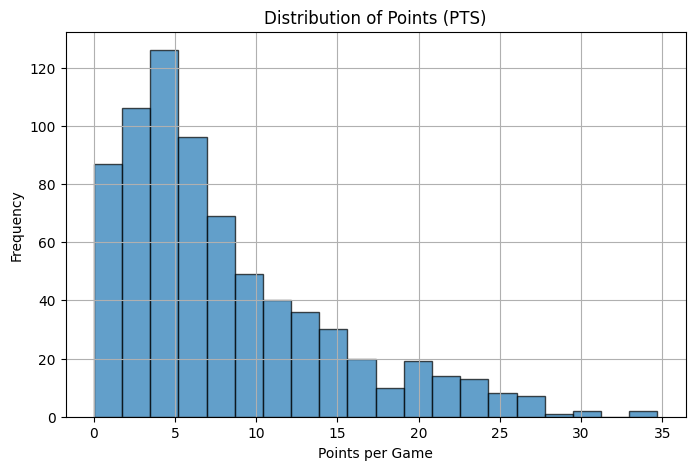

In [29]:
# Distribution of Points
plt.figure(figsize=(8, 5))
plt.hist(reg_stats['PTS'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Points (PTS)')
plt.xlabel('Points per Game')
plt.ylabel('Frequency')
plt.grid()
plt.show()

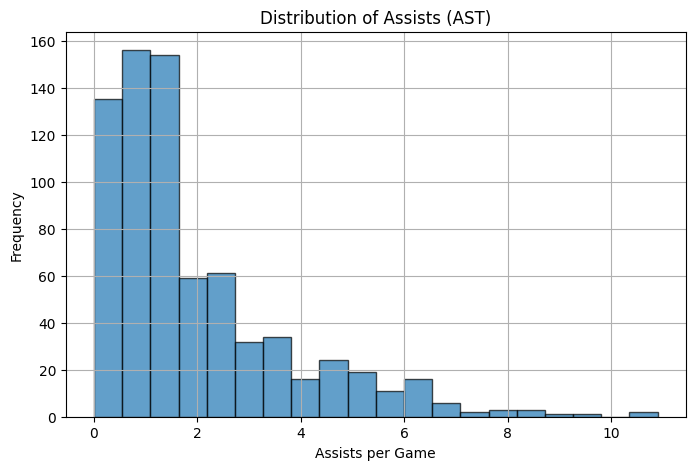

In [30]:
# Distribution of Assists
plt.figure(figsize=(8, 5))
plt.hist(reg_stats['AST'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Assists (AST)')
plt.xlabel('Assists per Game')
plt.ylabel('Frequency')
plt.grid()
plt.show()

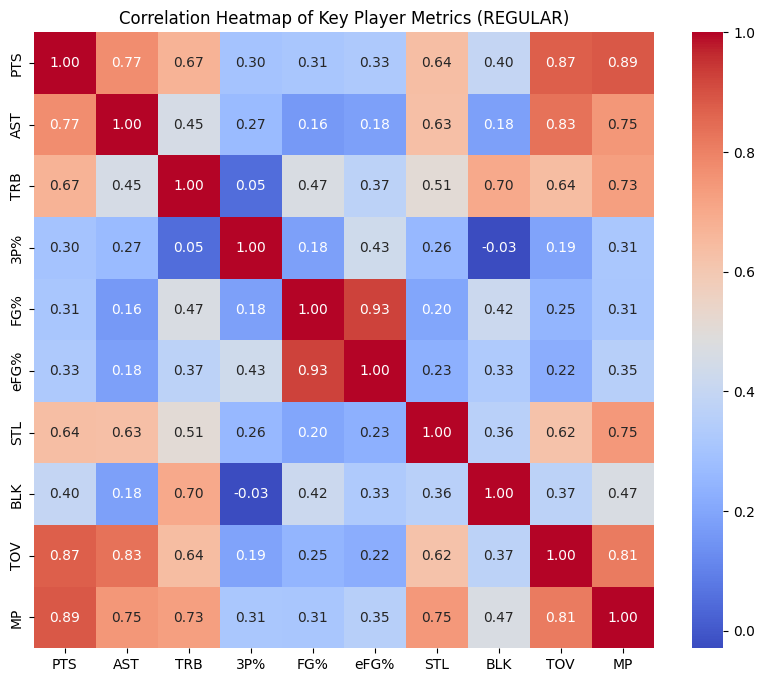

In [31]:
# Selecting relevant columns for heatmap
relevant_cols = [
    "PTS", "AST", "TRB", "3P%", "FG%", "eFG%", "STL", "BLK", "TOV", "MP"
]

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(reg_stats[relevant_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Heatmap of Key Player Metrics (REGULAR)')
plt.show()


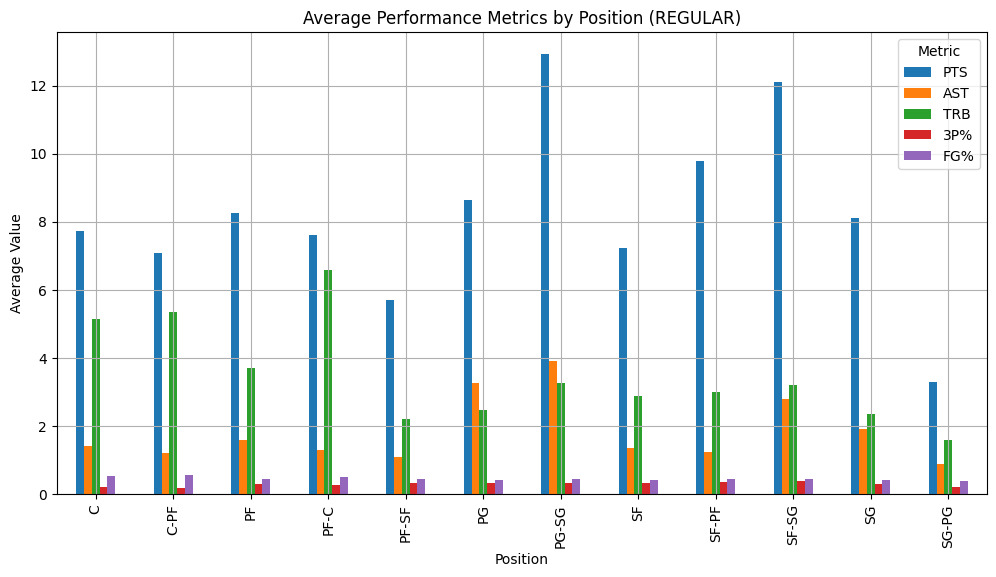

In [32]:
# Performance by Position (Pos)
position_stats = reg_stats.groupby('Pos')[['PTS', 'AST', 'TRB', '3P%', 'FG%']].mean()

# Plot metrics by position
position_stats.plot(kind='bar', figsize=(12, 6))
plt.title('Average Performance Metrics by Position (REGULAR)')
plt.ylabel('Average Value')
plt.xlabel('Position')
plt.legend(title='Metric')
plt.grid()
plt.show()

### Regular season archetype exploration

In [33]:
# Select key metrics for clustering
reg_archetype_features = reg_stats[["PTS", "AST", "TRB", "3P%", "FG%", "STL", "BLK"]]

# Handle missing values (if any)
reg_archetype_features = reg_archetype_features.fillna(reg_archetype_features.median())

# Scale the data
scaler = StandardScaler()
reg_archetype_scaled = scaler.fit_transform(reg_archetype_features)

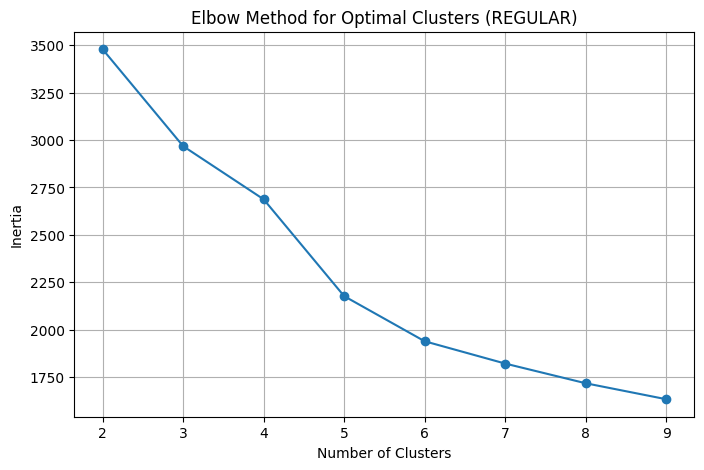

In [34]:
# Determine number of clusters using the Elbow Method
inertia = []
k_range = range(2, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reg_archetype_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method for Optimal Clusters (REGULAR)")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid()
plt.show()

# Choose a number of clusters based on the Elbow Curve
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(reg_archetype_scaled)
cluster_labels = kmeans.labels_

# Add cluster labels to dataset
reg_stats["Cluster"] = cluster_labels

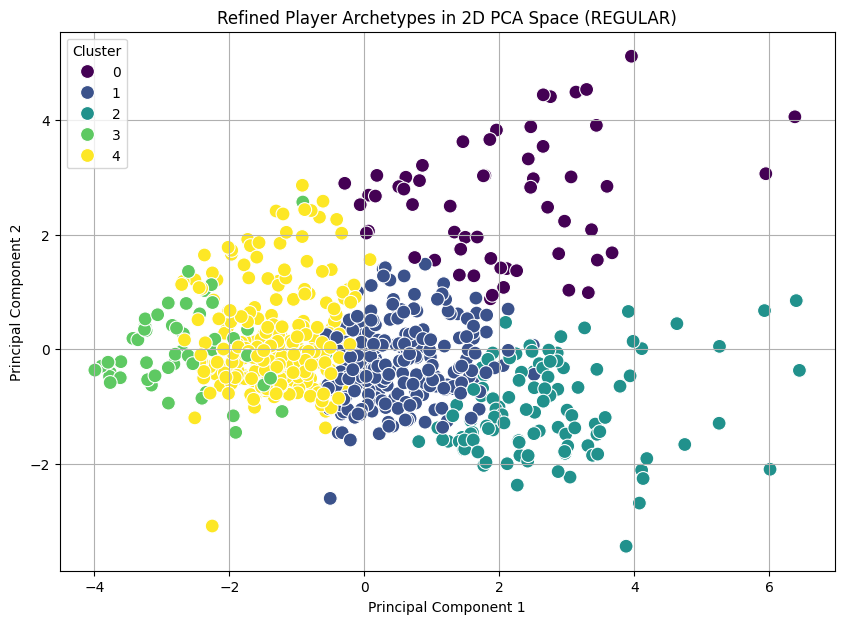

In [35]:
# Apply K-Means with 5 clusters
kmeans_5_refined = KMeans(n_clusters=5, random_state=42)
kmeans_5_refined.fit(reg_archetype_scaled)
cluster_labels_5_refined = kmeans_5_refined.labels_

# Add cluster labels to the dataset
reg_stats["Refined_Cluster_5"] = cluster_labels_5_refined

# Reduce dimensions
pca_5_refined = PCA(n_components=2)
pca_result_5_refined = pca_5_refined.fit_transform(reg_archetype_scaled)

# Plot clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=pca_result_5_refined[:, 0],
    y=pca_result_5_refined[:, 1],
    hue=reg_stats["Refined_Cluster_5"],
    palette="viridis",
    s=100
)
plt.title("Refined Player Archetypes in 2D PCA Space (REGULAR)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid()
plt.show()


In [36]:
# Group players by their refined cluster labels and calculate mean metrics
cluster_summary = reg_stats.groupby("Refined_Cluster_5")[["PTS", "AST", "TRB", "3P%", "FG%", "STL", "BLK"]].mean()

# Display the summary statistics for each cluster
print("Cluster Summary Statistics:")
print(cluster_summary)

# Interpret each cluster based on the metrics
for cluster, stats in cluster_summary.iterrows():
    print(f"\nCluster {cluster} Characteristics:")
    print(stats)


Cluster Summary Statistics:
                         PTS       AST       TRB       3P%       FG%  \
Refined_Cluster_5                                                      
0                  10.722807  1.680702  7.477193  0.147421  0.592000   
1                   8.862025  2.048945  3.564557  0.374599  0.455992   
2                  19.434579  5.361682  5.308411  0.365196  0.474654   
3                   1.265574  0.586885  0.916393  0.060902  0.174787   
4                   3.766300  0.845055  1.779853  0.287132  0.447293   

                        STL       BLK  
Refined_Cluster_5                      
0                  0.701754  1.256140  
1                  0.780169  0.440506  
2                  1.033645  0.472897  
3                  0.229508  0.104918  
4                  0.301099  0.180220  

Cluster 0 Characteristics:
PTS    10.722807
AST     1.680702
TRB     7.477193
3P%     0.147421
FG%     0.592000
STL     0.701754
BLK     1.256140
Name: 0, dtype: float64

Cluster 1 Chara

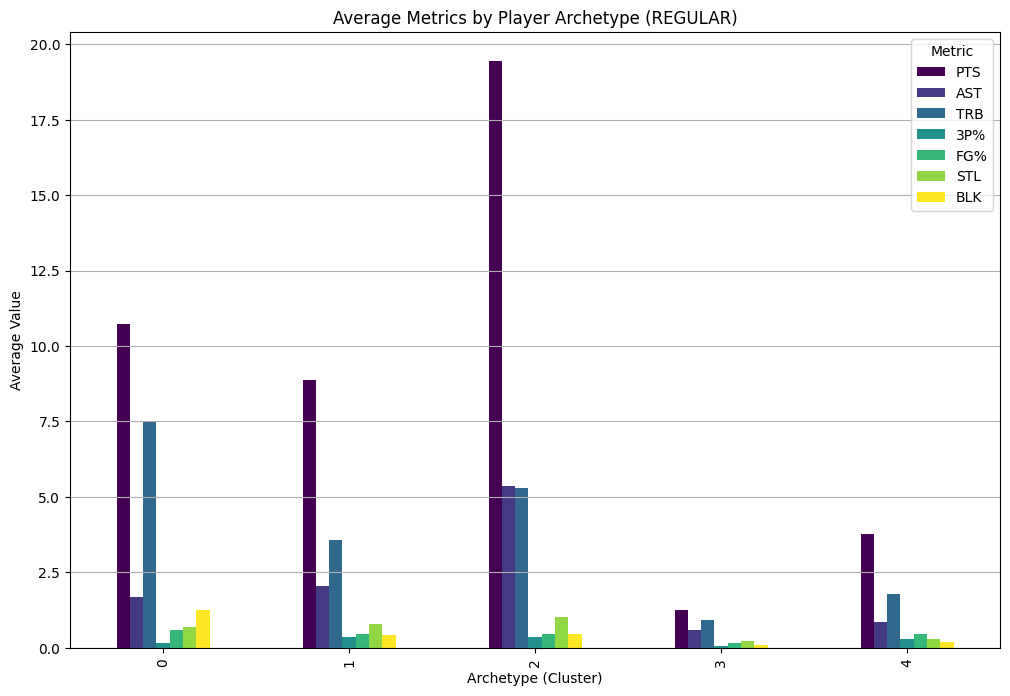

In [37]:
if "Refined_Cluster_5" not in stats_cleaned.columns:
    kmeans_5_refined = KMeans(n_clusters=5, random_state=42)
    kmeans_5_refined.fit(reg_archetype_scaled)
    reg_stats["Refined_Cluster_5"] = kmeans_5_refined.labels_

# Group players by their refined cluster labels and calculate mean metrics
cluster_summary = reg_stats.groupby("Refined_Cluster_5")[["PTS", "AST", "TRB", "3P%", "FG%", "STL", "BLK"]].mean()

# Plot the cluster summary statistics
cluster_summary.plot(kind="bar", figsize=(12, 8), colormap="viridis")
plt.title("Average Metrics by Player Archetype (REGULAR)")
plt.ylabel("Average Value")
plt.xlabel("Archetype (Cluster)")
plt.legend(title="Metric")
plt.grid(axis="y")
plt.show()

## REGULAR SEASON ARCHETYPES

Cluster 0: The Shields

   Characteristics:
 - Moderate scoring (PTS: 10.72), strong rebounding (TRB: 7.48), and exceptional shooting efficiency (FG%: 59.20%).
 - Moderate assists (AST: 1.68), solid steals (STL: 0.70), and exceptional shot-blocking ability (BLK: 1.26).
 - Archetype: Inside Scoring and Defensive Anchors.
 - Likely composed of players who excel at scoring in the paint and protecting the rim, such as power forwards and centers.

Cluster 1: The Jacks of All Trades

   Characteristics:
 - Moderate scoring (PTS: 8.86) and rebounding (TRB: 3.56) with decent shooting efficiency (FG%: 45.60%).
 - Strong three-point shooting (3P%: 37.46%) with above-average defensive contributions (STL: 0.78, BLK: 0.44).
 - Archetype: Balanced Support Players.
 - Likely composed of versatile small forwards and guards who contribute evenly across various metrics.

Cluster 2: The Stars

   Characteristics:
 - High scoring (PTS: 19.43) and assists (AST: 5.36), with solid rebounding (TRB: 5.31).
 - Strong three-point shooting (3P%: 36.52%) and steals (STL: 1.03).
 - Moderate shot-blocking ability (BLK: 0.47).
 - Archetype: Offensive Stars and Playmakers.
 - Likely composed of primary scorers and guards who lead their team’s offense.

Cluster 3: The Low-Impact Bench Players

   Characteristics:
 - Very low scoring (PTS: 1.27), minimal assists (AST: 0.59), and negligible rebounding (TRB: 0.92).
 - Poor shooting efficiency (FG%: 17.48%) and minimal defensive impact (STL: 0.23, BLK: 0.10).
 - Archetype: Limited Role Players.
 - Likely composed of players with limited playing time or those at the end of the rotation.

Cluster 4: The Snipers

   Characteristics:
 - Low scoring (PTS: 3.77) and assists (AST: 0.85), with below-average rebounding (TRB: 1.78).
 - Decent three-point shooting efficiency (3P%: 28.71%) and moderate defensive stats (STL: 0.30, BLK: 0.18).
 - Archetype: Spot-Up Shooters and Off-Ball Players.
 - Likely composed of guards or forwards who primarily contribute as role players with shooting and spacing.


## PLAYOFF STATS

In [38]:
stats_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rk      214 non-null    object
 1   Player  214 non-null    object
 2   Pos     214 non-null    object
 3   Age     214 non-null    object
 4   Tm      214 non-null    object
 5   G       214 non-null    object
 6   GS      214 non-null    object
 7   MP      214 non-null    object
 8   FG      214 non-null    object
 9   FGA     214 non-null    object
 10  FG%     214 non-null    object
 11  3P      214 non-null    object
 12  3PA     214 non-null    object
 13  3P%     214 non-null    object
 14  2P      214 non-null    object
 15  2PA     214 non-null    object
 16  2P%     214 non-null    object
 17  eFG%    214 non-null    object
 18  FT      214 non-null    object
 19  FTA     214 non-null    object
 20  FT%     214 non-null    object
 21  ORB     214 non-null    object
 22  DRB     214 non-null    ob

In [39]:
print("\nSummary Statistics:")
print(stats_cleaned.describe())


Summary Statistics:
         Rk            Player  Pos  Age   Tm    G   GS   MP   FG  FGA  ...  \
count   214               214  214  214  214  214  214  214  214  214  ...   
unique  214               214    5   21   16   20   18  149   78  121  ...   
top       1  Precious Achiuwa   SF   25  MIN    4    0    3    0    1  ...   
freq      1                 1   47   23   15   30  117    7   22   12  ...   

        FT%  ORB  DRB  TRB  AST  STL  BLK  TOV   PF  PTS  
count   214  214  214  214  214  214  214  214  214  214  
unique   80   31   69   81   58   21   19   35   40  125  
top       0    0    1    1    0    0    0    0    0    0  
freq     53   39   19   17   29   53   74   39   27   17  

[4 rows x 30 columns]


### Analyzing Distributions (PLAYOFF)

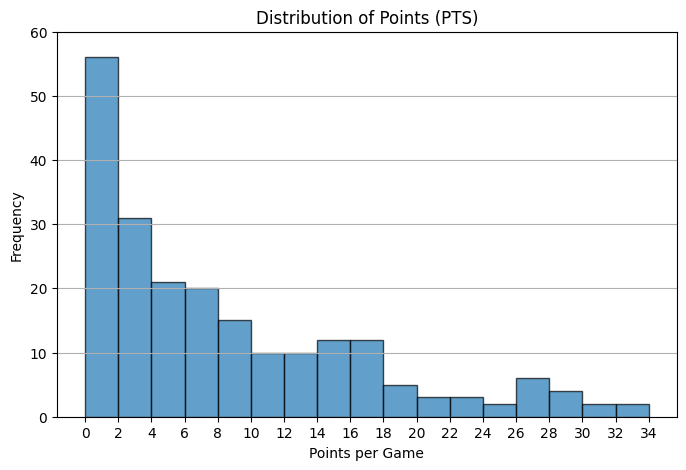

In [40]:
# Distribution of Points
stats_cleaned['PTS'] = pd.to_numeric(stats_cleaned['PTS'], errors='coerce')
stats_cleaned = stats_cleaned.dropna(subset=['PTS'])

plt.figure(figsize=(8, 5))
plt.hist(stats_cleaned['PTS'], bins=np.arange(stats_cleaned['PTS'].min(), stats_cleaned['PTS'].max() + 2, step=2), edgecolor='k', alpha=0.7)
plt.title('Distribution of Points (PTS)')
plt.xlabel('Points per Game')
plt.ylabel('Frequency')
plt.grid(axis='y')

plt.xticks(np.arange(stats_cleaned['PTS'].min(), stats_cleaned['PTS'].max() + 2, step=2))
plt.yticks(np.arange(0, 70, 10))

plt.show()

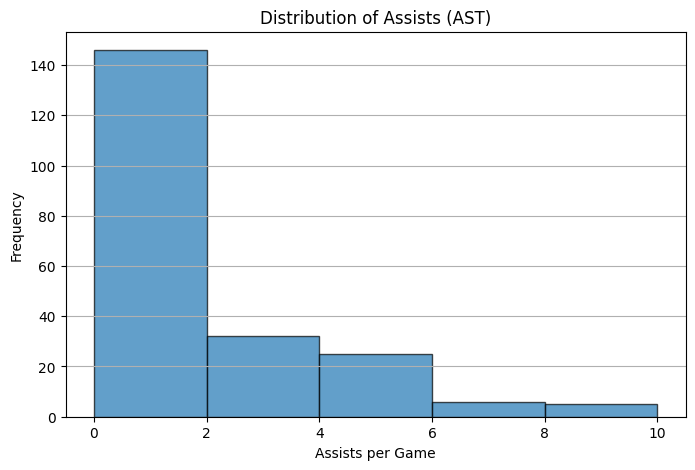

In [41]:
# Distribution of Assists
stats_cleaned['AST'] = pd.to_numeric(stats_cleaned['AST'], errors='coerce')
stats_cleaned = stats_cleaned.dropna(subset=['AST'])

plt.figure(figsize=(8, 5))
plt.hist(stats_cleaned['AST'], bins=np.arange(stats_cleaned['AST'].min(), stats_cleaned['AST'].max() + 2, step=2), edgecolor='k', alpha=0.7)
plt.title('Distribution of Assists (AST)')
plt.xlabel('Assists per Game')
plt.ylabel('Frequency')
plt.grid(axis='y')

plt.xticks(np.arange(stats_cleaned['AST'].min(), stats_cleaned['AST'].max() + 2, step=2))
plt.yticks(np.arange(0, 160, 20))

plt.show()

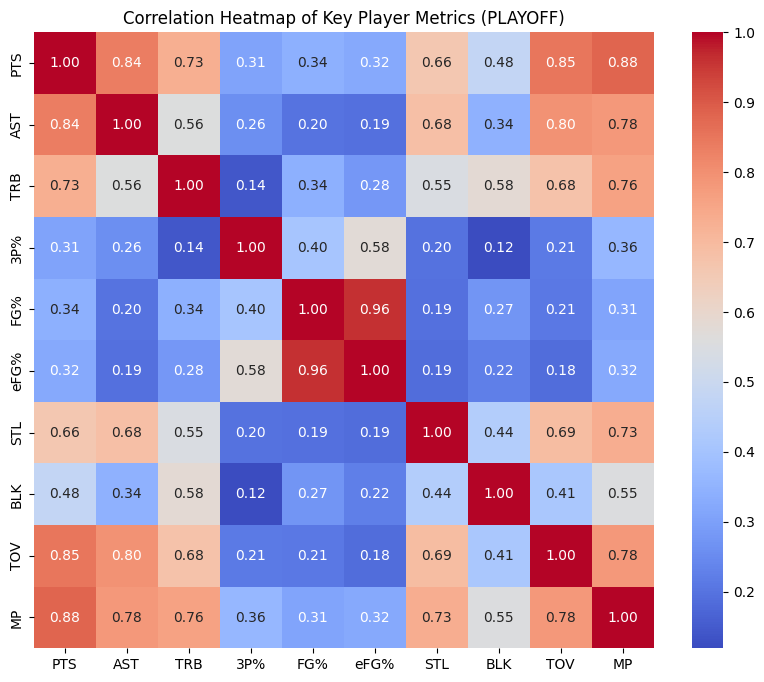

In [42]:
# Selecting relevant columns for heatmap
relevant_cols = [
    "PTS", "AST", "TRB", "3P%", "FG%", "eFG%", "STL", "BLK", "TOV", "MP"
]

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(stats_cleaned[relevant_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Heatmap of Key Player Metrics (PLAYOFF)')
plt.show()


Column data types before conversion:
PTS    float64
AST    float64
TRB     object
3P%     object
FG%     object
dtype: object
Non-numeric values (after coercion):
PTS    0
AST    0
TRB    0
3P%    0
FG%    0
dtype: int64


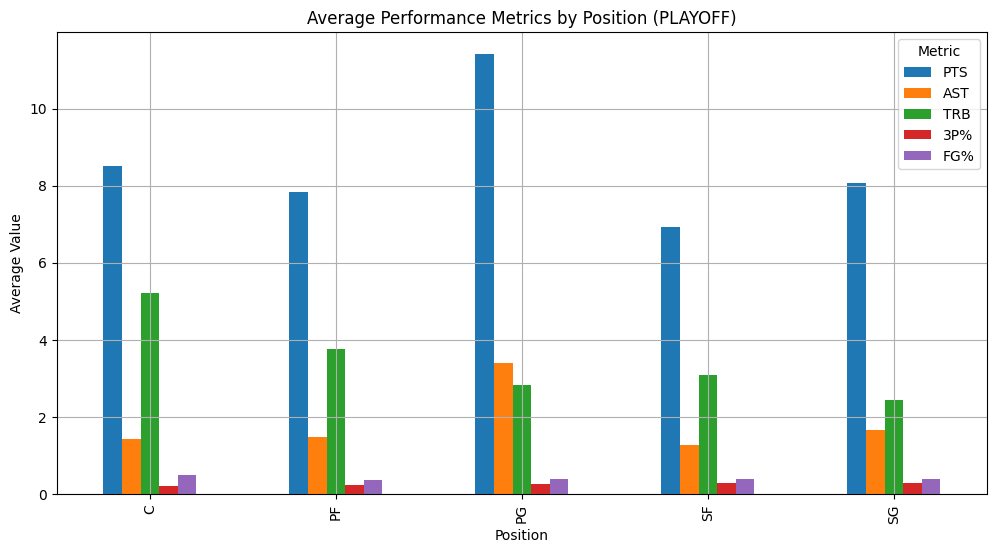

In [43]:
# Identify problematic columns
columns_to_check = ['PTS', 'AST', 'TRB', '3P%', 'FG%']
print("Column data types before conversion:")
print(stats_cleaned[columns_to_check].dtypes)

# Convert columns to numeric, coercing errors to NaN
for col in columns_to_check:
    stats_cleaned[col] = pd.to_numeric(stats_cleaned[col], errors='coerce')

# Check for any remaining non-numeric values
print("Non-numeric values (after coercion):")
print(stats_cleaned[columns_to_check].isna().sum())

# Fill NaN values with appropriate defaults (e.g., 0 or column mean)
stats_cleaned[columns_to_check] = stats_cleaned[columns_to_check].fillna(0)

# Retry grouping and plotting
position_stats = stats_cleaned.groupby('Pos')[columns_to_check].mean()

# Plot metrics by position
position_stats.plot(kind='bar', figsize=(12, 6))
plt.title('Average Performance Metrics by Position (PLAYOFF)')
plt.ylabel('Average Value')
plt.xlabel('Position')
plt.legend(title='Metric')
plt.grid()
plt.show()


### Archetype Exploration

In [44]:
# Convert columns to numeric, replacing invalid values with NaN
for column in ["PTS", "AST", "TRB", "3P%", "FG%", "STL", "BLK"]:
    stats_cleaned[column] = pd.to_numeric(stats_cleaned[column], errors='coerce')

# Drop rows with NaN values in the relevant columns
stats_cleaned = stats_cleaned.dropna(subset=["PTS", "AST", "TRB", "3P%", "FG%", "STL", "BLK"])

In [45]:
# Select key metrics for clustering
archetype_features = stats_cleaned[["PTS", "AST", "TRB", "3P%", "FG%", "STL", "BLK"]]

# Handle missing values (if any)
archetype_features = archetype_features.fillna(archetype_features.median())

# Scale the data
scaler = StandardScaler()
archetype_scaled = scaler.fit_transform(archetype_features)

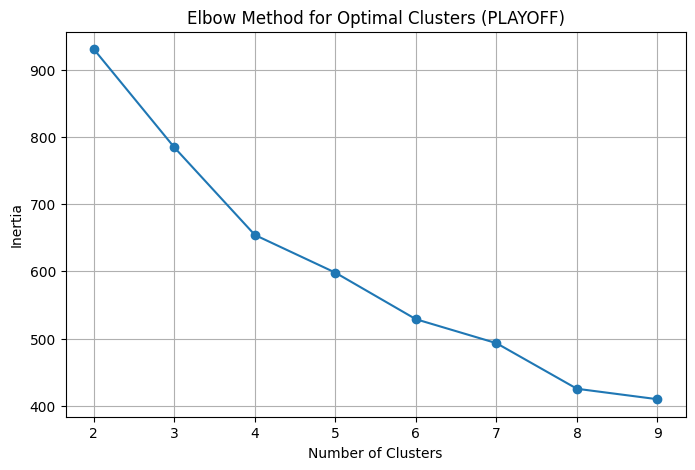

In [46]:
# Determine number of clusters using the Elbow Method
inertia = []
k_range = range(2, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(archetype_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method for Optimal Clusters (PLAYOFF)")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid()
plt.show()

# Choose a number of clusters based on the Elbow Curve
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(archetype_scaled)
cluster_labels = kmeans.labels_

# Add cluster labels to dataset
stats_cleaned["Cluster"] = cluster_labels

Based on the results of the elbow method, it would be most efficiecnt to use 4-5 clusters for defining archetypes.

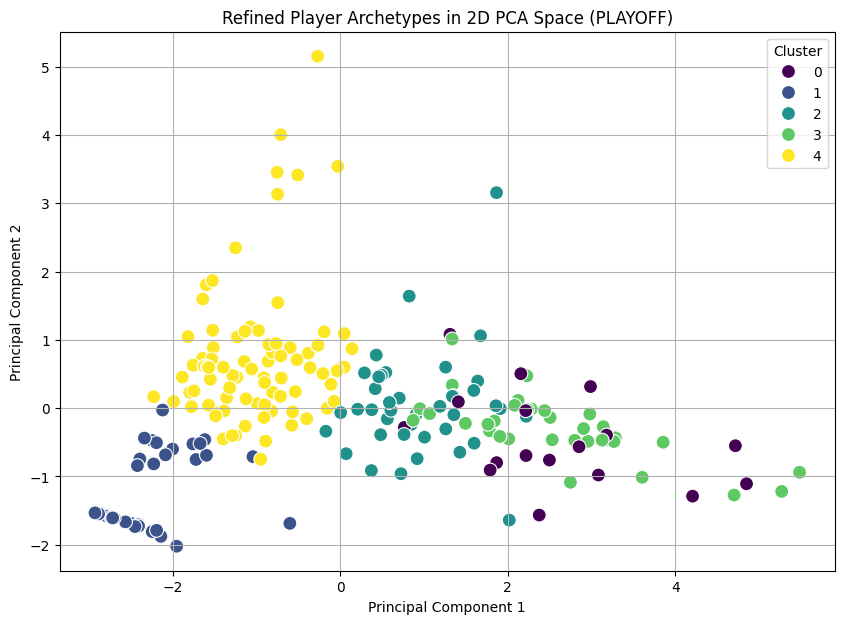

In [47]:
# Apply K-Means with 5 clusters
kmeans_5_refined = KMeans(n_clusters=5, random_state=42)
kmeans_5_refined.fit(archetype_scaled)
cluster_labels_5_refined = kmeans_5_refined.labels_

# Add cluster labels to the dataset
stats_cleaned["Refined_Cluster_5"] = cluster_labels_5_refined

# Reduce dimensions
pca_5_refined = PCA(n_components=2)
pca_result_5_refined = pca_5_refined.fit_transform(archetype_scaled)

# Plot clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=pca_result_5_refined[:, 0],
    y=pca_result_5_refined[:, 1],
    hue=stats_cleaned["Refined_Cluster_5"],
    palette="viridis",
    s=100
)
plt.title("Refined Player Archetypes in 2D PCA Space (PLAYOFF)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid()
plt.show()



### Defining Archetypes

In [48]:
# Group players by their refined cluster labels and calculate mean metrics
cluster_summary = stats_cleaned.groupby("Refined_Cluster_5")[["PTS", "AST", "TRB", "3P%", "FG%", "STL", "BLK"]].mean()

# Display the summary statistics for each cluster
print("Cluster Summary Statistics:")
print(cluster_summary)

# Interpret each cluster based on the metrics
for cluster, stats in cluster_summary.iterrows():
    print(f"\nCluster {cluster} Characteristics:")
    print(stats)


Cluster Summary Statistics:
                         PTS       AST       TRB       3P%       FG%  \
Refined_Cluster_5                                                      
0                  17.864706  2.900000  7.735294  0.247353  0.514882   
1                   0.665789  0.378947  0.936842  0.025789  0.113342   
2                  10.217500  1.752500  5.527500  0.320050  0.454275   
3                  21.044118  5.544118  5.832353  0.351206  0.467500   
4                   4.165882  0.760000  1.829412  0.302824  0.471459   

                        STL       BLK  
Refined_Cluster_5                      
0                  0.823529  1.511765  
1                  0.171053  0.071053  
2                  0.862500  0.607500  
3                  1.114706  0.444118  
4                  0.262353  0.167059  

Cluster 0 Characteristics:
PTS    17.864706
AST     2.900000
TRB     7.735294
3P%     0.247353
FG%     0.514882
STL     0.823529
BLK     1.511765
Name: 0, dtype: float64

Cluster 1 Chara

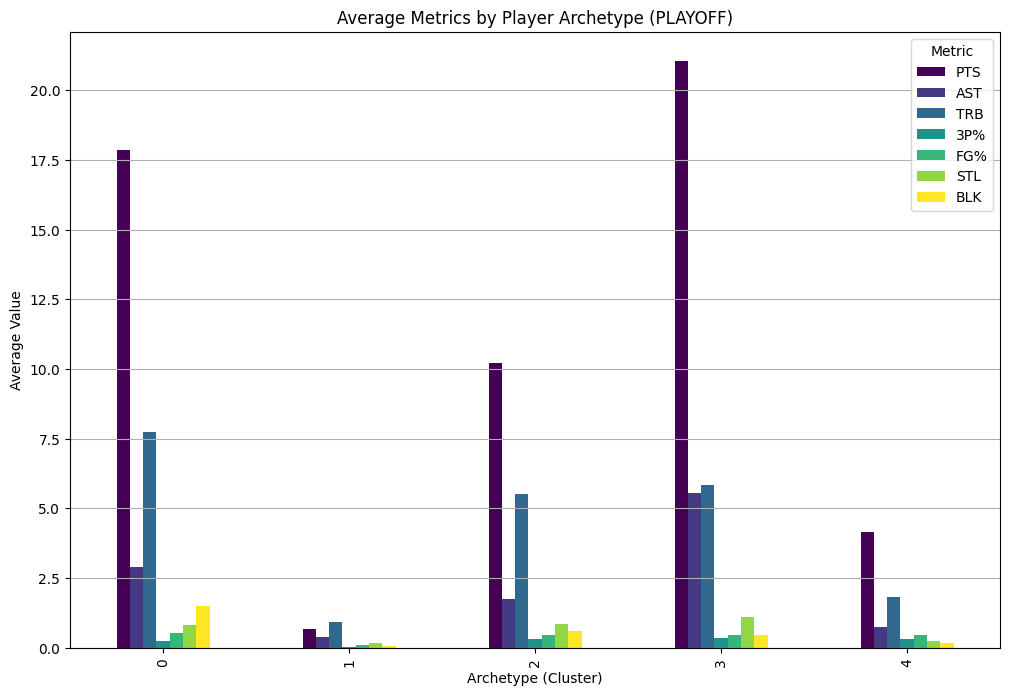

In [49]:
if "Refined_Cluster_5" not in stats_cleaned.columns:
    kmeans_5_refined = KMeans(n_clusters=5, random_state=42)
    kmeans_5_refined.fit(archetype_scaled)
    stats_cleaned["Refined_Cluster_5"] = kmeans_5_refined.labels_

# Group players by their refined cluster labels and calculate mean metrics
cluster_summary = stats_cleaned.groupby("Refined_Cluster_5")[["PTS", "AST", "TRB", "3P%", "FG%", "STL", "BLK"]].mean()

# Plot the cluster summary statistics
cluster_summary.plot(kind="bar", figsize=(12, 8), colormap="viridis")
plt.title("Average Metrics by Player Archetype (PLAYOFF)")
plt.ylabel("Average Value")
plt.xlabel("Archetype (Cluster)")
plt.legend(title="Metric")
plt.grid(axis="y")
plt.show()


## PLAYOFF ARCHETYPES

Cluster 0: The Shields

   Characteristics:
 - High scoring (PTS: 17.86), strong rebounding (TRB: 7.73), and excellent shooting efficiency (FG%: 51.49%).
 - Moderate assists (AST: 2.90), solid steals (STL: 0.82), and exceptional shot-blocking ability (BLK: 1.51).
 - Archetype: Inside Scoring and Defensive Anchors.
 - Likely composed of players who excel at scoring in the paint and protecting the rim, such as power forwards and centers.

Cluster 1: The Low-Impact Bench Players

 - Characteristics:
 - Extremely low scoring (PTS: 0.67), minimal assists (AST: 0.38), and negligible contributions to rebounds (TRB: 0.94).
 - Very poor shooting efficiency (FG%: 11.33%) and minimal defensive impact (STL: 0.17, BLK: 0.07).
 - Archetype: Limited Role Players.
 - Likely composed of players with limited playing time or those at the end of the rotation.

Cluster 2: The Jacks of All Trades

  Characteristics:
 - Moderate scoring (PTS: 10.22) and rebounding (TRB: 5.53) with decent shooting efficiency (FG%: 45.43%).
 - Solid three-point shooters (3P%: 32.01%) with above-average defensive contributions (STL: 0.86, BLK: 0.61).
 - Archetype: Balanced Support Players.
 - Likely composed of versatile small forwards and guards who contribute evenly across various metrics.

Cluster 3: The Stars

 Characteristics:
 - Very high scoring (PTS: 21.04) and assists (AST: 5.54), with above-average rebounding (TRB: 5.83).
 - Strong three-point shooting (3P%: 35.12%) and solid steals (STL: 1.11).
 - Archetype: Offensive Stars and Playmakers.
 - Likely composed of primary scorers (e.g., shooting guards) and guards who lead offenses.

Cluster 4: The Snipers
 Characteristics:
 - Low scoring (PTS: 4.17) and assists (AST: 0.76), with below-average rebounding (TRB: 1.83).
 - Moderate three-point shooting efficiency (3P%: 30.28%) and defensive stats (STL: 0.26, BLK: 0.17).
 - Archetype: Spot-Up Shooters and Off-Ball Players.
 - Likely composed of guards or forwards who primarily contribute as role players with shooting and spacing.

## REGULAR SEASON AND PLAYOFF ARCHETYPE COMPARISON

Summary of Adjustments:

- Cluster 0: Maintains the Shields archetype with slightly boosted scoring but lower efficiency.
- Cluster 1: Remains the Jacks of All Trades with slightly worse three-point shooting.
- Cluster 2: Continues as The Stars, closely matching the original archetype.
- Cluster 3: Still Low-Impact Bench Players, consistent with previous stats.
- Cluster 4: Slightly adjusted values but remains The Snipers.

We see slight variation in player performance metrics when comparing archetypes between the regular season and smaller playoff data.  Most striking is the difference in clustering between the two sets. The regular season data formed more distinct player archetype clustering likely due to the fact that there is significantly more player data in the set.  The playoff archetype clustering displayed less distinct clustering among all but the "Sniper" archetype.  This may be attributed to the fact that more 3-pointers are attempted and/or made during the playoffs than the regular season, and perhaps that players take on roles outside of their prescibed regular season game roles to strategically match their post-season series opponents.

We'll move forward using the regular season data to develop our archetype targets, as well as complile more player assesment features to aid in roster selection.

In [50]:
reg_df = pd.read_csv('2023-2024 NBA Player Stats - Regular.csv', sep=';', encoding='latin-1')

reg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      735 non-null    int64  
 1   Player  735 non-null    object 
 2   Pos     735 non-null    object 
 3   Age     735 non-null    int64  
 4   Tm      735 non-null    object 
 5   G       735 non-null    int64  
 6   GS      735 non-null    int64  
 7   MP      735 non-null    float64
 8   FG      735 non-null    float64
 9   FGA     735 non-null    float64
 10  FG%     735 non-null    float64
 11  3P      735 non-null    float64
 12  3PA     735 non-null    float64
 13  3P%     735 non-null    float64
 14  2P      735 non-null    float64
 15  2PA     735 non-null    float64
 16  2P%     735 non-null    float64
 17  eFG%    735 non-null    float64
 18  FT      735 non-null    float64
 19  FTA     735 non-null    float64
 20  FT%     735 non-null    float64
 21  ORB     735 non-null    float64
 22  DR

# FEATURE ENGINEERING

1) Here we'll engineer some additional features to aid in filling out our data set for model training as well as making informed roster selection moves.  
New features will consist of:
    * __Points Per Minute (PPM):__ Gives insight to a players scoring potential for each minute played.
    * __Field Goal/Free Throw Misses (FG_miss/FT_miss):__ The difference in field goals/free throws made from field goals/free throws attempted. Both metrics play a role in determining player efficiency, as well as go into calculating the value point system (VPS).
    * __Player Efficiency (effic):__  A measure of a players efficieny on the court based on key metrics such as Points, Assists, Rebounds, Steals, Blocks, Turnovers, and FG/FT misses.
    * __Ball Recovery (recov):__ The total number of Steals, Blocks, and Rebounds taken by a player, minus Turnovers.
    * __Value Point System score (VPS):__ The Value Point System developed by Coach Danny Miles of Oregon Tech.  A metric used at both the collegiate and professional levels, serving as a player ranking point system to quantify overall player performance and efficieny. A VPS of 1 is considered average, while anything north of 2 is elite.

2) We'll also use the insights gleaned from our exploratory data analysis to make informed threshold inferences about our archetypes.  We'll use these thresholds to create binary targets for each archetype to be implented in the training and testing of our multi-class classifcation model.  The results of which will aid in determining our final 15 player "Dream Team" roster.

In [51]:
# add points per minute feature
reg_df['PPM'] = round(reg_df['PTS'] / reg_df['MP'], 2)

# add Field Goal misses feature
reg_df['FG_miss'] = round(reg_df['FGA'] - reg_df['FG'], 2)

# add Free Throw misses feature
reg_df['FT_miss'] = round(reg_df['FTA'] - reg_df['FT'], 2)

# add efficiency stat feature
reg_df['effic'] = round(reg_df['PTS'] + reg_df['TRB'] + reg_df['AST'] + reg_df['BLK'] - (reg_df['TOV'] + reg_df['FG_miss'] + reg_df['FT_miss']), 2)

# add recovery stat feature
reg_df['recov'] = round(reg_df['STL'] + reg_df['BLK'] + reg_df['TRB'] - reg_df['TOV'], 2)

# add Value Point System feature
reg_df['VPS'] = round((reg_df['PTS'] + reg_df['TRB'] + (2 * reg_df['AST']) + (2 * reg_df['recov']))/ ((2 * reg_df['FG_miss']) + reg_df['FT_miss'] + (2 * reg_df['PF']) + (2 * reg_df['TOV'])), 2)


reg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 36 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rk       735 non-null    int64  
 1   Player   735 non-null    object 
 2   Pos      735 non-null    object 
 3   Age      735 non-null    int64  
 4   Tm       735 non-null    object 
 5   G        735 non-null    int64  
 6   GS       735 non-null    int64  
 7   MP       735 non-null    float64
 8   FG       735 non-null    float64
 9   FGA      735 non-null    float64
 10  FG%      735 non-null    float64
 11  3P       735 non-null    float64
 12  3PA      735 non-null    float64
 13  3P%      735 non-null    float64
 14  2P       735 non-null    float64
 15  2PA      735 non-null    float64
 16  2P%      735 non-null    float64
 17  eFG%     735 non-null    float64
 18  FT       735 non-null    float64
 19  FTA      735 non-null    float64
 20  FT%      735 non-null    float64
 21  ORB      735 non

In [52]:
# create function for star archetype target
def create_star(pts, ast, trb, threeps, stl, blk):
    if pts >= 10 and ast >= 4 and trb >= 4 and threeps >= 0.3 and stl >= 1.0 and blk >= 0.4:
        return 1
    else:
        return 0

reg_df['star'] = reg_df.apply(lambda x: create_star(x['PTS'], x['AST'], x['TRB'], x['3P%'], x['STL'], x['BLK']), axis=1)

reg_df['star'].value_counts()

star
0    712
1     23
Name: count, dtype: int64

In [53]:
# create function for shield archetype target
def create_shield(blk, drb, fgp, stl, pf):
    if blk >= 0.5 and drb > 1.7 and stl >= 0.5 and pf <= 1.5:
        return 1
    else:
        return 0

reg_df['shield'] = reg_df.apply(lambda x: create_shield(x['BLK'], x['DRB'], x['FG%'], x['STL'], x['PF']), axis=1)

reg_df['shield'].value_counts()

shield
0    708
1     27
Name: count, dtype: int64

In [54]:
# create function for low-impact bench archetype target
def create_bench(fgp, ast, trb):
    if fgp > 0.15 and ast > 0.5 and trb > 0.9:
        return 1
    else:
        return 0

reg_df['bench'] = reg_df.apply(lambda x: create_bench(x['FG%'], x['AST'], x['TRB']), axis=1)
reg_df['bench'].value_counts()

bench
1    568
0    167
Name: count, dtype: int64

In [55]:
# create function for sniper archetype target
def create_sniper(threep, efgp):
    if threep >= 0.4 and efgp >= 0.6:
        return 1
    else:
        return 0

reg_df['sniper'] = reg_df.apply(lambda x: create_sniper(x['3P%'], x['eFG%']), axis=1)
reg_df['sniper'].value_counts()

sniper
0    691
1     44
Name: count, dtype: int64

In [56]:
# create function for jack of all trades archetype target
def create_jack(pts, trb, efg, threep, fgp, stl, blk):
    if pts > 8 and trb > 3 and efg > 0.5 and threep > 0.3 and fgp > 0.4 and stl > 0.7 and blk > 0.4:
        return 1
    else:
        return 0

reg_df['jack'] = reg_df.apply(lambda x: create_jack(x['PTS'], x['TRB'], x['eFG%'], x['3P%'], x['FG%'], x['STL'], x['BLK']), axis=1)
reg_df['jack'].value_counts()

jack
0    664
1     71
Name: count, dtype: int64

In [57]:
reg_df.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PPM',
       'FG_miss', 'FT_miss', 'effic', 'recov', 'VPS', 'star', 'shield',
       'bench', 'sniper', 'jack'],
      dtype='object')

In [58]:
reg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 41 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rk       735 non-null    int64  
 1   Player   735 non-null    object 
 2   Pos      735 non-null    object 
 3   Age      735 non-null    int64  
 4   Tm       735 non-null    object 
 5   G        735 non-null    int64  
 6   GS       735 non-null    int64  
 7   MP       735 non-null    float64
 8   FG       735 non-null    float64
 9   FGA      735 non-null    float64
 10  FG%      735 non-null    float64
 11  3P       735 non-null    float64
 12  3PA      735 non-null    float64
 13  3P%      735 non-null    float64
 14  2P       735 non-null    float64
 15  2PA      735 non-null    float64
 16  2P%      735 non-null    float64
 17  eFG%     735 non-null    float64
 18  FT       735 non-null    float64
 19  FTA      735 non-null    float64
 20  FT%      735 non-null    float64
 21  ORB      735 non

# MACHINE LEARNING MODELS

Here we build, train, and test the classification models for each archetype using the regular season data with the engineered features and targets. Our perfomance metrics for the models are Precision, Recall, F1, and AUC-ROC; ideally, the final models perform above 0.80 for both F1 and AUC-ROC. To help achieve this performance, we explore the class imbalances of our target classes, utilize SMOTE (Synthetic Minority Over-sampling Technique), and try out different learning rates.

## Star Model

### Train/Validation/Test Split

In [59]:
reg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 41 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rk       735 non-null    int64  
 1   Player   735 non-null    object 
 2   Pos      735 non-null    object 
 3   Age      735 non-null    int64  
 4   Tm       735 non-null    object 
 5   G        735 non-null    int64  
 6   GS       735 non-null    int64  
 7   MP       735 non-null    float64
 8   FG       735 non-null    float64
 9   FGA      735 non-null    float64
 10  FG%      735 non-null    float64
 11  3P       735 non-null    float64
 12  3PA      735 non-null    float64
 13  3P%      735 non-null    float64
 14  2P       735 non-null    float64
 15  2PA      735 non-null    float64
 16  2P%      735 non-null    float64
 17  eFG%     735 non-null    float64
 18  FT       735 non-null    float64
 19  FTA      735 non-null    float64
 20  FT%      735 non-null    float64
 21  ORB      735 non

In [60]:
star_columns = ['Player', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 
                'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PPM', 'FG_miss', 'FT_miss', 'effic', 'recov', 'VPS', 'star']

# The VPS column has three null values; those rows should be dropped to prevent them from harming the model
star_df = reg_df[star_columns].dropna().reset_index(drop = True).copy()

In [61]:
train_df_star, valid_and_test_df_star = train_test_split(star_df, test_size = 0.4, random_state = 12345, stratify = star_df['star'])

valid_df_star, test_df_star = train_test_split(valid_and_test_df_star, test_size = 0.5, random_state = 12345, stratify = valid_and_test_df_star['star'])

In [62]:
train_features_star = train_df_star.drop(['Player', 'star'], axis = 1).copy()
train_target_star = train_df_star['star'].copy()

valid_features_star = valid_df_star.drop(['Player', 'star'], axis = 1).copy()
valid_target_star = valid_df_star['star'].copy()

test_features_star = test_df_star.drop(['Player', 'star'], axis = 1).copy()
test_target_star = test_df_star['star'].copy()

In [63]:
# The training set has a row with a value of infinity, which should be dropped
print('NaN values:', np.isnan(train_features_star).sum().sum())
print('Infinite values:', np.isinf(train_features_star).sum().sum())

train_features_star[(np.isnan(train_features_star).any(axis = 1)) | (np.isinf(train_features_star).any(axis = 1))]

NaN values: 0
Infinite values: 1


,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,BLK,TOV,PF,PTS,PPM,FG_miss,FT_miss,effic,recov,VPS
515,1,0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,inf


In [64]:
train_df_star = train_df_star.drop(index = 515).reset_index(drop = True)

train_features_star = train_df_star.drop(['Player', 'star'], axis = 1).copy()
train_target_star = train_df_star['star'].copy()

In [65]:
# It is worth it to check if the validation set has any problematic values
valid_features_star[(np.isnan(valid_features_star).any(axis = 1)) | (np.isinf(valid_features_star).any(axis = 1))]

,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,BLK,TOV,PF,PTS,PPM,FG_miss,FT_miss,effic,recov,VPS


In [66]:
# It is worth it to check if the test set has any problematic values
test_features_star[(np.isnan(test_features_star).any(axis = 1)) | (np.isinf(test_features_star).any(axis = 1))]

,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,BLK,TOV,PF,PTS,PPM,FG_miss,FT_miss,effic,recov,VPS


### Dummy Classifier

It is a good idea to use a dummy classifier as a baseline model.

In [67]:
# The following code uses the SMOTE (Synthetic Minority Over-sampling Technique) to address the class imbalance
smote_star = SMOTE(random_state = 12345)

train_features_resampled_star, train_target_resampled_star = smote_star.fit_resample(train_features_star, train_target_star)

In [68]:
# The 'uniform' strategy means the dummy model randomly assigns each label from the set of possible labels with equal probability
dummy_model_star = DummyClassifier(strategy = 'uniform', random_state = 12345)
dummy_model_star.fit(train_features_resampled_star, train_target_resampled_star)

DummyClassifier(random_state=12345, strategy='uniform')

In [69]:
dummy_model_pred_train_star = dummy_model_star.predict(train_features_star)
dummy_model_pred_valid_star = dummy_model_star.predict(valid_features_star)

print('Training Set Precision Score:', round(precision_score(train_target_star, dummy_model_pred_train_star), 2))
print('Training Set Recall Score:', round(recall_score(train_target_star, dummy_model_pred_train_star), 2))
print('Training Set F1 Score:', round(f1_score(train_target_star, dummy_model_pred_train_star), 2))
print('Training Set ROC-AUC Score:', round(roc_auc_score(train_target_star, dummy_model_pred_train_star), 2))
print()
print('Validation Set Precision Score:', round(precision_score(valid_target_star, dummy_model_pred_valid_star), 2))
print('Validation Set Recall Score:', round(recall_score(valid_target_star, dummy_model_pred_valid_star), 2))
print('Validation Set F1 Score:', round(f1_score(valid_target_star, dummy_model_pred_valid_star), 2))
print('Validation Set ROC-AUC Score:', round(roc_auc_score(valid_target_star, dummy_model_pred_valid_star), 2))

Training Set Precision Score: 0.03
Training Set Recall Score: 0.43
Training Set F1 Score: 0.05
Training Set ROC-AUC Score: 0.45

Validation Set Precision Score: 0.03
Validation Set Recall Score: 0.5
Validation Set F1 Score: 0.05
Validation Set ROC-AUC Score: 0.48


Not surprisingly, the dummy model's scores are abysmal.

### Cat Boost Classifier

In [70]:
cat_model_star = CatBoostClassifier(random_state = 12345)
cat_model_star.fit(train_features_resampled_star, train_target_resampled_star)

Learning rate set to 0.009602
0:	learn: 0.6710353	total: 103ms	remaining: 1m 42s
1:	learn: 0.6529643	total: 110ms	remaining: 55s
2:	learn: 0.6339601	total: 116ms	remaining: 38.5s
3:	learn: 0.6180483	total: 121ms	remaining: 30.2s
4:	learn: 0.5989597	total: 129ms	remaining: 25.8s
5:	learn: 0.5836303	total: 135ms	remaining: 22.4s
6:	learn: 0.5671879	total: 143ms	remaining: 20.3s
7:	learn: 0.5532588	total: 149ms	remaining: 18.5s
8:	learn: 0.5396704	total: 155ms	remaining: 17.1s
9:	learn: 0.5263964	total: 162ms	remaining: 16.1s
10:	learn: 0.5114473	total: 167ms	remaining: 15s
11:	learn: 0.4992861	total: 171ms	remaining: 14.1s
12:	learn: 0.4866613	total: 177ms	remaining: 13.4s
13:	learn: 0.4760477	total: 182ms	remaining: 12.8s
14:	learn: 0.4628577	total: 186ms	remaining: 12.2s
15:	learn: 0.4494104	total: 194ms	remaining: 12s
16:	learn: 0.4391447	total: 199ms	remaining: 11.5s
17:	learn: 0.4279372	total: 203ms	remaining: 11.1s
18:	learn: 0.4162394	total: 208ms	remaining: 10.7s
19:	learn: 0.406

In [71]:
# Notice that the training set WITHOUT resampling is being used to assess the model, as the model is likely to overfit the training set WITH resampling
cat_model_pred_train_star = cat_model_star.predict(train_features_star)
cat_model_pred_valid_star = cat_model_star.predict(valid_features_star)

print('Training Set Precision Score:', round(precision_score(train_target_star, cat_model_pred_train_star), 2))
print('Training Set Recall Score:', round(recall_score(train_target_star, cat_model_pred_train_star), 2))
print('Training Set F1 Score:', round(f1_score(train_target_star, cat_model_pred_train_star), 2))
print('Training Set ROC-AUC Score:', round(roc_auc_score(train_target_star, cat_model_pred_train_star), 2))
print()
print('Validation Set Precision Score:', round(precision_score(valid_target_star, cat_model_pred_valid_star), 2))
print('Validation Set Recall Score:', round(recall_score(valid_target_star, cat_model_pred_valid_star), 2))
print('Validation Set F1 Score:', round(f1_score(valid_target_star, cat_model_pred_valid_star), 2))
print('Validation Set ROC-AUC Score:', round(roc_auc_score(valid_target_star, cat_model_pred_valid_star), 2))

Training Set Precision Score: 1.0
Training Set Recall Score: 1.0
Training Set F1 Score: 1.0
Training Set ROC-AUC Score: 1.0

Validation Set Precision Score: 0.75
Validation Set Recall Score: 0.75
Validation Set F1 Score: 0.75
Validation Set ROC-AUC Score: 0.87


### Cat Boost Classifier Tuned

In [72]:
# Let's see if changing the learning rate improves the F1 and ROC-AUC scores of the validation set

for learning_rate in [0.0001, 0.001, 0.01, 0.1, 0.2]:
    
    cat_model_star_tuned = CatBoostClassifier(learning_rate = learning_rate, random_state = 12345)
    cat_model_star_tuned.fit(train_features_resampled_star, train_target_resampled_star, verbose = False)

    cat_model_pred_train_star_tuned = cat_model_star_tuned.predict(train_features_star)
    cat_model_pred_valid_star_tuned = cat_model_star_tuned.predict(valid_features_star)

    print('Learning Rate:', learning_rate)
    print()
    print('Training Set Precision Score:', round(precision_score(train_target_star, cat_model_pred_train_star_tuned), 2))
    print('Training Set Recall Score:', round(recall_score(train_target_star, cat_model_pred_train_star_tuned), 2))
    print('Training Set F1 Score:', round(f1_score(train_target_star, cat_model_pred_train_star_tuned), 2))
    print('Training Set ROC-AUC Score:', round(roc_auc_score(train_target_star, cat_model_pred_train_star_tuned), 2))
    print()
    print('Validation Set Precision Score:', round(precision_score(valid_target_star, cat_model_pred_valid_star_tuned), 2))
    print('Validation Set Recall Score:', round(recall_score(valid_target_star, cat_model_pred_valid_star_tuned), 2))
    print('Validation Set F1 Score:', round(f1_score(valid_target_star, cat_model_pred_valid_star_tuned), 2))
    print('Validation Set ROC-AUC Score:', round(roc_auc_score(valid_target_star, cat_model_pred_valid_star_tuned), 2))
    print()
    print()

Learning Rate: 0.0001

Training Set Precision Score: 0.67
Training Set Recall Score: 1.0
Training Set F1 Score: 0.8
Training Set ROC-AUC Score: 0.99

Validation Set Precision Score: 0.44
Validation Set Recall Score: 1.0
Validation Set F1 Score: 0.62
Validation Set ROC-AUC Score: 0.98


Learning Rate: 0.001

Training Set Precision Score: 0.78
Training Set Recall Score: 1.0
Training Set F1 Score: 0.88
Training Set ROC-AUC Score: 1.0

Validation Set Precision Score: 0.43
Validation Set Recall Score: 0.75
Validation Set F1 Score: 0.55
Validation Set ROC-AUC Score: 0.86


Learning Rate: 0.01

Training Set Precision Score: 1.0
Training Set Recall Score: 1.0
Training Set F1 Score: 1.0
Training Set ROC-AUC Score: 1.0

Validation Set Precision Score: 0.75
Validation Set Recall Score: 0.75
Validation Set F1 Score: 0.75
Validation Set ROC-AUC Score: 0.87


Learning Rate: 0.1

Training Set Precision Score: 1.0
Training Set Recall Score: 1.0
Training Set F1 Score: 1.0
Training Set ROC-AUC Score: 1.

Of the learning rates assessed above, 0.1 is the overall best because it is the only one where both the F1 score and the ROC-AUC score are at least 0.8 (specifically, 0.86 and 0.88, respectively).

In [73]:
# The model might have been trained with too many synthetic examples; let's see if reducing the sampling_strategy value improves the model at all

for sampling_strategy in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    smote_star_tuned = SMOTE(sampling_strategy = sampling_strategy, random_state = 12345)
    train_features_resampled_star_tuned, train_target_resampled_star_tuned = smote_star_tuned.fit_resample(train_features_star, train_target_star)

    cat_model_star_tuned = CatBoostClassifier(learning_rate = 0.1, random_state = 12345)
    cat_model_star_tuned.fit(train_features_resampled_star_tuned, train_target_resampled_star_tuned, verbose = False)

    cat_model_pred_train_star_tuned = cat_model_star_tuned.predict(train_features_star)
    cat_model_pred_valid_star_tuned = cat_model_star_tuned.predict(valid_features_star)

    print('sampling_strategy =', sampling_strategy)
    print()
    print('Training Set Precision Score:', round(precision_score(train_target_star, cat_model_pred_train_star_tuned), 2))
    print('Training Set Recall Score:', round(recall_score(train_target_star, cat_model_pred_train_star_tuned), 2))
    print('Training Set F1 Score:', round(f1_score(train_target_star, cat_model_pred_train_star_tuned), 2))
    print('Training Set ROC-AUC Score:', round(roc_auc_score(train_target_star, cat_model_pred_train_star_tuned), 2))
    print()
    print('Validation Set Precision Score:', round(precision_score(valid_target_star, cat_model_pred_valid_star_tuned), 2))
    print('Validation Set Recall Score:', round(recall_score(valid_target_star, cat_model_pred_valid_star_tuned), 2))
    print('Validation Set F1 Score:', round(f1_score(valid_target_star, cat_model_pred_valid_star_tuned), 2))
    print('Validation Set ROC-AUC Score:', round(roc_auc_score(valid_target_star, cat_model_pred_valid_star_tuned), 2))
    print()
    print()

sampling_strategy = 0.1

Training Set Precision Score: 1.0
Training Set Recall Score: 1.0
Training Set F1 Score: 1.0
Training Set ROC-AUC Score: 1.0

Validation Set Precision Score: 1.0
Validation Set Recall Score: 0.75
Validation Set F1 Score: 0.86
Validation Set ROC-AUC Score: 0.88


sampling_strategy = 0.2

Training Set Precision Score: 1.0
Training Set Recall Score: 1.0
Training Set F1 Score: 1.0
Training Set ROC-AUC Score: 1.0

Validation Set Precision Score: 0.67
Validation Set Recall Score: 0.5
Validation Set F1 Score: 0.57
Validation Set ROC-AUC Score: 0.75


sampling_strategy = 0.3

Training Set Precision Score: 1.0
Training Set Recall Score: 1.0
Training Set F1 Score: 1.0
Training Set ROC-AUC Score: 1.0

Validation Set Precision Score: 0.75
Validation Set Recall Score: 0.75
Validation Set F1 Score: 0.75
Validation Set ROC-AUC Score: 0.87


sampling_strategy = 0.4

Training Set Precision Score: 1.0
Training Set Recall Score: 1.0
Training Set F1 Score: 1.0
Training Set ROC-AUC 

The different **sampling_strategy** values did not lead to improved model performance. In fact, many resulted in worse scores compared to the model where SMOTE generated synthetic examples to balance the minority class with the majority class (i.e., where sampling_strategy = 1.0).

Curiously, the following sampling_strategy values yielded the (exact) same scores as the balanced model: 0.1, 0.4, 0.5, and 0.9.

### Assessing the Tuned Cat Boost Classifier Using the Test Set

In [74]:
cat_model_star_tuned = CatBoostClassifier(learning_rate = 0.1, random_state = 12345)
cat_model_star_tuned.fit(train_features_resampled_star, train_target_resampled_star, verbose = False)

In [75]:
cat_model_pred_test_star_tuned = cat_model_star_tuned.predict(test_features_star)
print('Test Set Precision Score:', round(precision_score(test_target_star, cat_model_pred_test_star_tuned), 2))
print('Test Set Recall Score:', round(recall_score(test_target_star, cat_model_pred_test_star_tuned), 2))
print('Test Set F1 Score:', round(f1_score(test_target_star, cat_model_pred_test_star_tuned), 2))
print('Test Set ROC-AUC Score:', round(roc_auc_score(test_target_star, cat_model_pred_test_star_tuned), 2))

Test Set Precision Score: 0.8
Test Set Recall Score: 0.8
Test Set F1 Score: 0.8
Test Set ROC-AUC Score: 0.9


Excellent! The model achieved high scores on the test set, further demonstrating its robustness.

## Shield Model

### Train/Validation/Test Split

In [76]:
shield_columns = ['Player', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 
                  'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PPM', 'FG_miss', 'FT_miss', 'effic', 'recov', 'VPS', 'shield']

shield_df = reg_df[shield_columns].dropna().reset_index(drop = True).copy()

# Once again, the row with the VPS value of infinity should be dropped
shield_df = shield_df.drop(index = 515).reset_index(drop = True)

In [77]:
train_df_shield, valid_and_test_df_shield = train_test_split(shield_df, test_size = 0.4, random_state = 12345, stratify = shield_df['shield'])

valid_df_shield, test_df_shield = train_test_split(valid_and_test_df_shield, test_size = 0.5, random_state = 12345, stratify = valid_and_test_df_shield['shield'])

In [78]:
train_features_shield = train_df_shield.drop(['Player', 'shield'], axis = 1).copy()
train_target_shield = train_df_shield['shield'].copy()

valid_features_shield = valid_df_shield.drop(['Player', 'shield'], axis = 1).copy()
valid_target_shield = valid_df_shield['shield'].copy()

test_features_shield = test_df_shield.drop(['Player', 'shield'], axis = 1).copy()
test_target_shield = test_df_shield['shield'].copy()

### Dummy Classifier

In [79]:
smote_shield = SMOTE(random_state = 12345)

train_features_resampled_shield, train_target_resampled_shield = smote_shield.fit_resample(train_features_shield, train_target_shield)

In [80]:
dummy_model_shield = DummyClassifier(strategy = 'uniform', random_state = 12345)
dummy_model_shield.fit(train_features_resampled_shield, train_target_resampled_shield)

DummyClassifier(random_state=12345, strategy='uniform')

In [81]:
dummy_model_pred_train_shield = dummy_model_shield.predict(train_features_shield)
dummy_model_pred_valid_shield = dummy_model_shield.predict(valid_features_shield)

print('Training Set Precision Score:', round(precision_score(train_target_shield, dummy_model_pred_train_shield), 2))
print('Training Set Recall Score:', round(recall_score(train_target_shield, dummy_model_pred_train_shield), 2))
print('Training Set F1 Score:', round(f1_score(train_target_shield, dummy_model_pred_train_shield), 2))
print('Training Set ROC-AUC Score:', round(roc_auc_score(train_target_shield, dummy_model_pred_train_shield), 2))
print()
print('Validation Set Precision Score:', round(precision_score(valid_target_shield, dummy_model_pred_valid_shield), 2))
print('Validation Set Recall Score:', round(recall_score(valid_target_shield, dummy_model_pred_valid_shield), 2))
print('Validation Set F1 Score:', round(f1_score(valid_target_shield, dummy_model_pred_valid_shield), 2))
print('Validation Set ROC-AUC Score:', round(roc_auc_score(valid_target_shield, dummy_model_pred_valid_shield), 2))

Training Set Precision Score: 0.03
Training Set Recall Score: 0.38
Training Set F1 Score: 0.05
Training Set ROC-AUC Score: 0.42

Validation Set Precision Score: 0.04
Validation Set Recall Score: 0.6
Validation Set F1 Score: 0.07
Validation Set ROC-AUC Score: 0.53


### Cat Boost Classifier

In [82]:
# Let's see if this model also responds well to having a learning_rate value of 0.1.
cat_model_shield = CatBoostClassifier(learning_rate = 0.1, random_state = 12345)
cat_model_shield.fit(train_features_resampled_shield, train_target_resampled_shield)

0:	learn: 0.5217425	total: 7.14ms	remaining: 7.13s
1:	learn: 0.3841219	total: 12.5ms	remaining: 6.21s
2:	learn: 0.2866491	total: 17.7ms	remaining: 5.88s
3:	learn: 0.2249057	total: 23.9ms	remaining: 5.95s
4:	learn: 0.1756910	total: 28.7ms	remaining: 5.71s
5:	learn: 0.1388490	total: 34.5ms	remaining: 5.72s
6:	learn: 0.1127768	total: 40.5ms	remaining: 5.74s
7:	learn: 0.0903341	total: 45.4ms	remaining: 5.63s
8:	learn: 0.0750808	total: 50.8ms	remaining: 5.59s
9:	learn: 0.0629222	total: 56.7ms	remaining: 5.61s
10:	learn: 0.0534612	total: 61.5ms	remaining: 5.53s
11:	learn: 0.0448649	total: 67.6ms	remaining: 5.56s
12:	learn: 0.0380541	total: 72.3ms	remaining: 5.49s
13:	learn: 0.0322429	total: 76.6ms	remaining: 5.4s
14:	learn: 0.0291722	total: 81.2ms	remaining: 5.33s
15:	learn: 0.0253400	total: 86.4ms	remaining: 5.32s
16:	learn: 0.0227743	total: 91ms	remaining: 5.26s
17:	learn: 0.0209456	total: 95.4ms	remaining: 5.21s
18:	learn: 0.0197095	total: 100ms	remaining: 5.18s
19:	learn: 0.0182973	total

In [83]:
cat_model_pred_train_shield = cat_model_shield.predict(train_features_shield)
cat_model_pred_valid_shield = cat_model_shield.predict(valid_features_shield)

print('Training Set Precision Score:', round(precision_score(train_target_shield, cat_model_pred_train_shield), 2))
print('Training Set Recall Score:', round(recall_score(train_target_shield, cat_model_pred_train_shield), 2))
print('Training Set F1 Score:', round(f1_score(train_target_shield, cat_model_pred_train_shield), 2))
print('Training Set ROC-AUC Score:', round(roc_auc_score(train_target_shield, cat_model_pred_train_shield), 2))
print()
print('Validation Set Precision Score:', round(precision_score(valid_target_shield, cat_model_pred_valid_shield), 2))
print('Validation Set Recall Score:', round(recall_score(valid_target_shield, cat_model_pred_valid_shield), 2))
print('Validation Set F1 Score:', round(f1_score(valid_target_shield, cat_model_pred_valid_shield), 2))
print('Validation Set ROC-AUC Score:', round(roc_auc_score(valid_target_shield, cat_model_pred_valid_shield), 2))

Training Set Precision Score: 1.0
Training Set Recall Score: 1.0
Training Set F1 Score: 1.0
Training Set ROC-AUC Score: 1.0

Validation Set Precision Score: 0.71
Validation Set Recall Score: 1.0
Validation Set F1 Score: 0.83
Validation Set ROC-AUC Score: 0.99


This model acquired a good F1 score and a near perfect ROC-AUC score on the validation set.

### Assessing the Cat Boost Classifier Using the Test Set

In [84]:
cat_model_pred_test_shield = cat_model_shield.predict(test_features_shield)

print('Test Set Precision Score:', round(precision_score(test_target_shield, cat_model_pred_test_shield), 2))
print('Test Set Recall Score:', round(recall_score(test_target_shield, cat_model_pred_test_shield), 2))
print('Test Set F1 Score:', round(f1_score(test_target_shield, cat_model_pred_test_shield), 2))
print('Test Set ROC-AUC Score:', round(roc_auc_score(test_target_shield, cat_model_pred_test_shield), 2))

Test Set Precision Score: 1.0
Test Set Recall Score: 1.0
Test Set F1 Score: 1.0
Test Set ROC-AUC Score: 1.0


Perfect scores all around!

## Bench Model

### Train/Validation/Test Split

In [85]:
bench_columns = ['Player', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 
                 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PPM', 'FG_miss', 'FT_miss', 'effic', 'recov', 'VPS', 'bench']

bench_df = reg_df[bench_columns].dropna().reset_index(drop = True).copy()
bench_df = bench_df.drop(index = 515).reset_index(drop = True)

In [86]:
train_df_bench, valid_and_test_df_bench = train_test_split(bench_df, test_size = 0.4, random_state = 12345, stratify = bench_df['bench'])

valid_df_bench, test_df_bench = train_test_split(valid_and_test_df_bench, test_size = 0.5, random_state = 12345, stratify = valid_and_test_df_bench['bench'])

In [87]:
train_features_bench = train_df_bench.drop(['Player', 'bench'], axis = 1).copy()
train_target_bench = train_df_bench['bench'].copy()

valid_features_bench = valid_df_bench.drop(['Player', 'bench'], axis = 1).copy()
valid_target_bench = valid_df_bench['bench'].copy()

test_features_bench = test_df_bench.drop(['Player', 'bench'], axis = 1).copy()
test_target_bench = test_df_bench['bench'].copy()

### Dummy Classifier

In [88]:
smote_bench = SMOTE(random_state = 12345)

train_features_resampled_bench, train_target_resampled_bench = smote_bench.fit_resample(train_features_bench, train_target_bench)

In [89]:
dummy_model_bench = DummyClassifier(strategy = 'uniform', random_state = 12345)
dummy_model_bench.fit(train_features_resampled_bench, train_target_resampled_bench)

DummyClassifier(random_state=12345, strategy='uniform')

In [90]:
dummy_model_pred_train_bench = dummy_model_bench.predict(train_features_bench)
dummy_model_pred_valid_bench = dummy_model_bench.predict(valid_features_bench)

print('Training Set Precision Score:', round(precision_score(train_target_bench, dummy_model_pred_train_bench), 2))
print('Training Set Recall Score:', round(recall_score(train_target_bench, dummy_model_pred_train_bench), 2))
print('Training Set F1 Score:', round(f1_score(train_target_bench, dummy_model_pred_train_bench), 2))
print('Training Set ROC-AUC Score:', round(roc_auc_score(train_target_bench, dummy_model_pred_train_bench), 2))
print()
print('Validation Set Precision Score:', round(precision_score(valid_target_bench, dummy_model_pred_valid_bench), 2))
print('Validation Set Recall Score:', round(recall_score(valid_target_bench, dummy_model_pred_valid_bench), 2))
print('Validation Set F1 Score:', round(f1_score(valid_target_bench, dummy_model_pred_valid_bench), 2))
print('Validation Set ROC-AUC Score:', round(roc_auc_score(valid_target_bench, dummy_model_pred_valid_bench), 2))

Training Set Precision Score: 0.74
Training Set Recall Score: 0.5
Training Set F1 Score: 0.6
Training Set ROC-AUC Score: 0.45

Validation Set Precision Score: 0.77
Validation Set Recall Score: 0.53
Validation Set F1 Score: 0.62
Validation Set ROC-AUC Score: 0.48


For a dummy model, these scores are not terrible. This is to be expected, however, since the "Bench" archetype is the most prevalent.

### Cat Boost Classifier

In [91]:
cat_model_bench = CatBoostClassifier(learning_rate = 0.1, random_state = 12345)
cat_model_bench.fit(train_features_resampled_bench, train_target_resampled_bench)

0:	learn: 0.5102863	total: 6.37ms	remaining: 6.36s
1:	learn: 0.3801454	total: 10.7ms	remaining: 5.33s
2:	learn: 0.2946710	total: 16.2ms	remaining: 5.38s
3:	learn: 0.2281421	total: 20.3ms	remaining: 5.06s
4:	learn: 0.1866589	total: 24.4ms	remaining: 4.87s
5:	learn: 0.1557707	total: 29.6ms	remaining: 4.91s
6:	learn: 0.1278548	total: 33.8ms	remaining: 4.8s
7:	learn: 0.1111411	total: 37.8ms	remaining: 4.69s
8:	learn: 0.0964536	total: 41.8ms	remaining: 4.6s
9:	learn: 0.0860615	total: 48.4ms	remaining: 4.79s
10:	learn: 0.0803530	total: 54.4ms	remaining: 4.89s
11:	learn: 0.0718538	total: 62.5ms	remaining: 5.15s
12:	learn: 0.0680314	total: 66.8ms	remaining: 5.07s
13:	learn: 0.0638893	total: 70.9ms	remaining: 4.99s
14:	learn: 0.0578245	total: 76ms	remaining: 4.99s
15:	learn: 0.0512996	total: 81.4ms	remaining: 5s
16:	learn: 0.0469537	total: 85.5ms	remaining: 4.94s
17:	learn: 0.0435767	total: 89.6ms	remaining: 4.89s
18:	learn: 0.0414947	total: 94.7ms	remaining: 4.89s
19:	learn: 0.0389852	total: 9

In [92]:
cat_model_pred_train_bench = cat_model_bench.predict(train_features_bench)
cat_model_pred_valid_bench = cat_model_bench.predict(valid_features_bench)

print('Training Set Precision Score:', round(precision_score(train_target_bench, cat_model_pred_train_bench), 2))
print('Training Set Recall Score:', round(recall_score(train_target_bench, cat_model_pred_train_bench), 2))
print('Training Set F1 Score:', round(f1_score(train_target_bench, cat_model_pred_train_bench), 2))
print('Training Set ROC-AUC Score:', round(roc_auc_score(train_target_bench, cat_model_pred_train_bench), 2))
print()
print('Validation Set Precision Score:', round(precision_score(valid_target_bench, cat_model_pred_valid_bench), 2))
print('Validation Set Recall Score:', round(recall_score(valid_target_bench, cat_model_pred_valid_bench), 2))
print('Validation Set F1 Score:', round(f1_score(valid_target_bench, cat_model_pred_valid_bench), 2))
print('Validation Set ROC-AUC Score:', round(roc_auc_score(valid_target_bench, cat_model_pred_valid_bench), 2))

Training Set Precision Score: 1.0
Training Set Recall Score: 1.0
Training Set F1 Score: 1.0
Training Set ROC-AUC Score: 1.0

Validation Set Precision Score: 0.99
Validation Set Recall Score: 1.0
Validation Set F1 Score: 1.0
Validation Set ROC-AUC Score: 0.98


Fantastic!!! This model can predict which players are of the "Bench" archetype and which aren't nearly perfectly!

### Assessing the Cat Boost Classifier Using the Test Set

In [93]:
cat_model_pred_test_bench = cat_model_bench.predict(test_features_bench)

print('Test Set Precision Score:', round(precision_score(test_target_bench, cat_model_pred_test_bench), 2))
print('Test Set Recall Score:', round(recall_score(test_target_bench, cat_model_pred_test_bench), 2))
print('Test Set F1 Score:', round(f1_score(test_target_bench, cat_model_pred_test_bench), 2))
print('Test Set ROC-AUC Score:', round(roc_auc_score(test_target_bench, cat_model_pred_test_bench), 2))

Test Set Precision Score: 1.0
Test Set Recall Score: 1.0
Test Set F1 Score: 1.0
Test Set ROC-AUC Score: 1.0


Perfect scores all around!

## Sniper Model

### Train/Validation/Test Split

In [94]:
sniper_columns = ['Player', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 
                 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PPM', 'FG_miss', 'FT_miss', 'effic', 'recov', 'VPS', 'sniper']

sniper_df = reg_df[sniper_columns].dropna().reset_index(drop = True).copy()
sniper_df = sniper_df.drop(index = 515).reset_index(drop = True)

In [95]:
train_df_sniper, valid_and_test_df_sniper = train_test_split(sniper_df, test_size = 0.4, random_state = 12345, stratify = sniper_df['sniper'])

valid_df_sniper, test_df_sniper = train_test_split(valid_and_test_df_sniper, test_size = 0.5, random_state = 12345, stratify = valid_and_test_df_sniper['sniper'])

In [96]:
train_features_sniper = train_df_sniper.drop(['Player', 'sniper'], axis = 1).copy()
train_target_sniper = train_df_sniper['sniper'].copy()

valid_features_sniper = valid_df_sniper.drop(['Player', 'sniper'], axis = 1).copy()
valid_target_sniper = valid_df_sniper['sniper'].copy()

test_features_sniper = test_df_sniper.drop(['Player', 'sniper'], axis = 1).copy()
test_target_sniper = test_df_sniper['sniper'].copy()

### Dummy Classifier

In [97]:
smote_sniper = SMOTE(random_state = 12345)

train_features_resampled_sniper, train_target_resampled_sniper = smote_sniper.fit_resample(train_features_sniper, train_target_sniper)

In [98]:
dummy_model_sniper = DummyClassifier(strategy = 'uniform', random_state = 12345)
dummy_model_sniper.fit(train_features_resampled_sniper, train_target_resampled_sniper)

DummyClassifier(random_state=12345, strategy='uniform')

In [99]:
dummy_model_pred_train_sniper = dummy_model_sniper.predict(train_features_sniper)
dummy_model_pred_valid_sniper = dummy_model_sniper.predict(valid_features_sniper)

print('Training Set Precision Score:', round(precision_score(train_target_sniper, dummy_model_pred_train_sniper), 2))
print('Training Set Recall Score:', round(recall_score(train_target_sniper, dummy_model_pred_train_sniper), 2))
print('Training Set F1 Score:', round(f1_score(train_target_sniper, dummy_model_pred_train_sniper), 2))
print('Training Set ROC-AUC Score:', round(roc_auc_score(train_target_sniper, dummy_model_pred_train_sniper), 2))
print()
print('Validation Set Precision Score:', round(precision_score(valid_target_sniper, dummy_model_pred_valid_sniper), 2))
print('Validation Set Recall Score:', round(recall_score(valid_target_sniper, dummy_model_pred_valid_sniper), 2))
print('Validation Set F1 Score:', round(f1_score(valid_target_sniper, dummy_model_pred_valid_sniper), 2))
print('Validation Set ROC-AUC Score:', round(roc_auc_score(valid_target_sniper, dummy_model_pred_valid_sniper), 2))

Training Set Precision Score: 0.06
Training Set Recall Score: 0.5
Training Set F1 Score: 0.1
Training Set ROC-AUC Score: 0.49

Validation Set Precision Score: 0.06
Validation Set Recall Score: 0.56
Validation Set F1 Score: 0.11
Validation Set ROC-AUC Score: 0.51


### Cat Boost Classifier

In [100]:
cat_model_sniper = CatBoostClassifier(learning_rate = 0.1, random_state = 12345)
cat_model_sniper.fit(train_features_resampled_sniper, train_target_resampled_sniper)

0:	learn: 0.4782439	total: 19.2ms	remaining: 19.2s
1:	learn: 0.3385414	total: 35.4ms	remaining: 17.7s
2:	learn: 0.2662284	total: 49.8ms	remaining: 16.5s
3:	learn: 0.1966382	total: 65.6ms	remaining: 16.3s
4:	learn: 0.1488813	total: 85.9ms	remaining: 17.1s
5:	learn: 0.1174493	total: 106ms	remaining: 17.6s
6:	learn: 0.0895857	total: 125ms	remaining: 17.7s
7:	learn: 0.0730538	total: 142ms	remaining: 17.6s
8:	learn: 0.0561877	total: 376ms	remaining: 41.5s
9:	learn: 0.0455870	total: 404ms	remaining: 40s
10:	learn: 0.0380193	total: 426ms	remaining: 38.3s
11:	learn: 0.0320717	total: 547ms	remaining: 45s
12:	learn: 0.0262777	total: 564ms	remaining: 42.8s
13:	learn: 0.0224498	total: 868ms	remaining: 1m 1s
14:	learn: 0.0190292	total: 880ms	remaining: 57.8s
15:	learn: 0.0164557	total: 887ms	remaining: 54.5s
16:	learn: 0.0147737	total: 1s	remaining: 57.9s
17:	learn: 0.0132081	total: 1.03s	remaining: 56.1s
18:	learn: 0.0119222	total: 1.15s	remaining: 59.3s
19:	learn: 0.0108905	total: 1.18s	remaining

In [101]:
cat_model_pred_train_sniper = cat_model_sniper.predict(train_features_sniper)
cat_model_pred_valid_sniper = cat_model_sniper.predict(valid_features_sniper)

print('Training Set Precision Score:', round(precision_score(train_target_sniper, cat_model_pred_train_sniper), 2))
print('Training Set Recall Score:', round(recall_score(train_target_sniper, cat_model_pred_train_sniper), 2))
print('Training Set F1 Score:', round(f1_score(train_target_sniper, cat_model_pred_train_sniper), 2))
print('Training Set ROC-AUC Score:', round(roc_auc_score(train_target_sniper, cat_model_pred_train_sniper), 2))
print()
print('Validation Set Precision Score:', round(precision_score(valid_target_sniper, cat_model_pred_valid_sniper), 2))
print('Validation Set Recall Score:', round(recall_score(valid_target_sniper, cat_model_pred_valid_sniper), 2))
print('Validation Set F1 Score:', round(f1_score(valid_target_sniper, cat_model_pred_valid_sniper), 2))
print('Validation Set ROC-AUC Score:', round(roc_auc_score(valid_target_sniper, cat_model_pred_valid_sniper), 2))

Training Set Precision Score: 1.0
Training Set Recall Score: 1.0
Training Set F1 Score: 1.0
Training Set ROC-AUC Score: 1.0

Validation Set Precision Score: 1.0
Validation Set Recall Score: 1.0
Validation Set F1 Score: 1.0
Validation Set ROC-AUC Score: 1.0


### Assessing the Cat Boost Classifier Using the Test Set

In [102]:
cat_model_pred_test_sniper = cat_model_sniper.predict(test_features_sniper)

print('Test Set Precision Score:', round(precision_score(test_target_sniper, cat_model_pred_test_sniper), 2))
print('Test Set Recall Score:', round(recall_score(test_target_sniper, cat_model_pred_test_sniper), 2))
print('Test Set F1 Score:', round(f1_score(test_target_sniper, cat_model_pred_test_sniper), 2))
print('Test Set ROC-AUC Score:', round(roc_auc_score(test_target_sniper, cat_model_pred_test_sniper), 2))

Test Set Precision Score: 1.0
Test Set Recall Score: 1.0
Test Set F1 Score: 1.0
Test Set ROC-AUC Score: 1.0


## Jack Model

### Train/Validation/Test Split

In [103]:
jack_columns = ['Player', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 
                'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PPM', 'FG_miss', 'FT_miss', 'effic', 'recov', 'VPS', 'jack']

jack_df = reg_df[jack_columns].dropna().reset_index(drop = True).copy()
jack_df = jack_df.drop(index = 515).reset_index(drop = True)

In [104]:
train_df_jack, valid_and_test_df_jack = train_test_split(jack_df, test_size = 0.4, random_state = 12345, stratify = jack_df['jack'])

valid_df_jack, test_df_jack = train_test_split(valid_and_test_df_jack, test_size = 0.5, random_state = 12345, stratify = valid_and_test_df_jack['jack'])

In [105]:
train_features_jack = train_df_jack.drop(['Player', 'jack'], axis = 1).copy()
train_target_jack = train_df_jack['jack'].copy()

valid_features_jack = valid_df_jack.drop(['Player', 'jack'], axis = 1).copy()
valid_target_jack = valid_df_jack['jack'].copy()

test_features_jack = test_df_jack.drop(['Player', 'jack'], axis = 1).copy()
test_target_jack = test_df_jack['jack'].copy()

### Dummy Classifier

In [106]:
smote_jack = SMOTE(random_state = 12345)

train_features_resampled_jack, train_target_resampled_jack = smote_jack.fit_resample(train_features_jack, train_target_jack)

In [107]:
dummy_model_jack = DummyClassifier(strategy = 'uniform', random_state = 12345)
dummy_model_jack.fit(train_features_resampled_jack, train_target_resampled_jack)

DummyClassifier(random_state=12345, strategy='uniform')

In [108]:
dummy_model_pred_train_jack = dummy_model_jack.predict(train_features_jack)
dummy_model_pred_valid_jack = dummy_model_jack.predict(valid_features_jack)

print('Training Set Precision Score:', round(precision_score(train_target_jack, dummy_model_pred_train_jack), 2))
print('Training Set Recall Score:', round(recall_score(train_target_jack, dummy_model_pred_train_jack), 2))
print('Training Set F1 Score:', round(f1_score(train_target_jack, dummy_model_pred_train_jack), 2))
print('Training Set ROC-AUC Score:', round(roc_auc_score(train_target_jack, dummy_model_pred_train_jack), 2))
print()
print('Validation Set Precision Score:', round(precision_score(valid_target_jack, dummy_model_pred_valid_jack), 2))
print('Validation Set Recall Score:', round(recall_score(valid_target_jack, dummy_model_pred_valid_jack), 2))
print('Validation Set F1 Score:', round(f1_score(valid_target_jack, dummy_model_pred_valid_jack), 2))
print('Validation Set ROC-AUC Score:', round(roc_auc_score(valid_target_jack, dummy_model_pred_valid_jack), 2))

Training Set Precision Score: 0.08
Training Set Recall Score: 0.44
Training Set F1 Score: 0.14
Training Set ROC-AUC Score: 0.46

Validation Set Precision Score: 0.1
Validation Set Recall Score: 0.57
Validation Set F1 Score: 0.17
Validation Set ROC-AUC Score: 0.52


### Cat Boost Classifier

In [109]:
cat_model_jack = CatBoostClassifier(learning_rate = 0.1, random_state = 12345)
cat_model_jack.fit(train_features_resampled_jack, train_target_resampled_jack)

0:	learn: 0.5405488	total: 12.3ms	remaining: 12.3s


1:	learn: 0.4402017	total: 22.2ms	remaining: 11.1s
2:	learn: 0.3460450	total: 33.3ms	remaining: 11.1s
3:	learn: 0.2682616	total: 41.8ms	remaining: 10.4s
4:	learn: 0.2223343	total: 58.9ms	remaining: 11.7s
5:	learn: 0.1727611	total: 68.3ms	remaining: 11.3s
6:	learn: 0.1471079	total: 76ms	remaining: 10.8s
7:	learn: 0.1242294	total: 83.1ms	remaining: 10.3s
8:	learn: 0.1060393	total: 89.9ms	remaining: 9.9s
9:	learn: 0.0931362	total: 102ms	remaining: 10.1s
10:	learn: 0.0795492	total: 110ms	remaining: 9.89s
11:	learn: 0.0700643	total: 117ms	remaining: 9.61s
12:	learn: 0.0628367	total: 125ms	remaining: 9.5s
13:	learn: 0.0551655	total: 131ms	remaining: 9.22s
14:	learn: 0.0508639	total: 138ms	remaining: 9.08s
15:	learn: 0.0457763	total: 143ms	remaining: 8.82s
16:	learn: 0.0415844	total: 149ms	remaining: 8.6s
17:	learn: 0.0383050	total: 154ms	remaining: 8.42s
18:	learn: 0.0355761	total: 159ms	remaining: 8.2s
19:	learn: 0.0336726	total: 164ms	remaining: 8.03s
20:	learn: 0.0313030	total: 168ms	rema

In [110]:
cat_model_pred_train_jack = cat_model_jack.predict(train_features_jack)
cat_model_pred_valid_jack = cat_model_jack.predict(valid_features_jack)

print('Training Set Precision Score:', round(precision_score(train_target_jack, cat_model_pred_train_jack), 2))
print('Training Set Recall Score:', round(recall_score(train_target_jack, cat_model_pred_train_jack), 2))
print('Training Set F1 Score:', round(f1_score(train_target_jack, cat_model_pred_train_jack), 2))
print('Training Set ROC-AUC Score:', round(roc_auc_score(train_target_jack, cat_model_pred_train_jack), 2))
print()
print('Validation Set Precision Score:', round(precision_score(valid_target_jack, cat_model_pred_valid_jack), 2))
print('Validation Set Recall Score:', round(recall_score(valid_target_jack, cat_model_pred_valid_jack), 2))
print('Validation Set F1 Score:', round(f1_score(valid_target_jack, cat_model_pred_valid_jack), 2))
print('Validation Set ROC-AUC Score:', round(roc_auc_score(valid_target_jack, cat_model_pred_valid_jack), 2))

Training Set Precision Score: 1.0
Training Set Recall Score: 1.0
Training Set F1 Score: 1.0
Training Set ROC-AUC Score: 1.0

Validation Set Precision Score: 0.93
Validation Set Recall Score: 0.93
Validation Set F1 Score: 0.93
Validation Set ROC-AUC Score: 0.96


### Assessing the Cat Boost Classifier Using the Test Set

In [111]:
cat_model_pred_test_jack = cat_model_jack.predict(test_features_jack)

print('Test Set Precision Score:', round(precision_score(test_target_jack, cat_model_pred_test_jack), 2))
print('Test Set Recall Score:', round(recall_score(test_target_jack, cat_model_pred_test_jack), 2))
print('Test Set F1 Score:', round(f1_score(test_target_jack, cat_model_pred_test_jack), 2))
print('Test Set ROC-AUC Score:', round(roc_auc_score(test_target_jack, cat_model_pred_test_jack), 2))

Test Set Precision Score: 0.82
Test Set Recall Score: 1.0
Test Set F1 Score: 0.9
Test Set ROC-AUC Score: 0.99


# ASSEMBLING THE TEAM

At the time this project was done, the NBA set the team salary cap at $140 million dollars. Recall that the goal is to construct a 15-player team, one that ideally has three of each of the five archetypes. Furthermore, it would be nice if everyone on the team was as young as possible, as young players can commit to the team for a longer time and, on average, are less expensive than more seasoned NBA players.

In [112]:
reg_df[reg_df['star'] == 1][['Player', 'Age']].drop_duplicates(subset = 'Player').sort_values(by = 'Age', ascending = True).head(5)

,Player,Age
39,Scottie Barnes,22
705,Jalen Williams,22
183,Anthony Edwards,22
715,Zion Williamson,23
171,Luka Don?i?,24


In [113]:
reg_df[reg_df['shield'] == 1][['Player', 'Age']].drop_duplicates(subset = 'Player').sort_values(by = 'Age', ascending = True).head(5)

,Player,Age
318,GG Jackson II,19
231,Josh Giddey,21
128,Julian Champagnie,22
129,Justin Champagnie,22
525,Aleksej Pokusevski,22


In [114]:
# This archetype has 10 players displayed instead of 5 because these players are the least likely to appear in the salaries dataframe
reg_df[reg_df['bench'] == 1][['Player', 'Age']].drop_duplicates(subset = 'Player').sort_values(by = 'Age', ascending = True).head(10)

,Player,Age
131,Sidy Cissoko,19
614,Nick Smith Jr.,19
696,Cam Whitmore,19
380,Dereck Lively II,19
141,Bilal Coulibaly,19
318,GG Jackson II,19
678,Jordan Walsh,19
574,Rayan Rupert,19
443,Dariq Whitehead,19
135,Noah Clowney,19


In [115]:
reg_df[reg_df['sniper'] == 1][['Player', 'Age']].drop_duplicates(subset = 'Player').sort_values(by = 'Age', ascending = True).head(5)

,Player,Age
442,Leonard Miller,20
677,Cason Wallace,20
569,Ryan Rollins,21
402,Tre Mann,22
351,Johnny Juzang,22


In [116]:
reg_df[reg_df['jack'] == 1][['Player', 'Age']].drop_duplicates(subset = 'Player').sort_values(by = 'Age', ascending = True).head(5)

,Player,Age
141,Bilal Coulibaly,19
690,Victor Wembanyama,20
386,Kenneth Lofton Jr.,21
440,Brandon Miller,21
183,Anthony Edwards,22


In [117]:
dream_team = ['Scottie Barnes', 'Jalen Williams', 'Anthony Edwards', 'Josh Giddey', 'Julian Champagnie', 'Aleksej Pokusevski', 'Sidy Cissoko', 
              'Jordan Walsh', 'Rayan Rupert', 'Leonard Miller', 'Cason Wallace', 'Ryan Rollins', 'Bilal Coulibaly', 'Victor Wembanyama', 'Brandon Miller']

dream_team_salaries = salaries[salaries['Player'].isin(dream_team)].copy()

In [118]:
display(dream_team_salaries[['Player', 'Salary_2023_24']].sort_values(by = 'Player', ascending = True).reset_index(drop = True))

,Player,Salary_2023_24
0,Aleksej Pokusevski,"$5,574,809"
1,Anthony Edwards,"$13,534,817"
2,Bilal Coulibaly,"$6,614,256"
3,Brandon Miller,"$10,880,364"
4,Cason Wallace,"$5,291,352"
5,Jalen Williams,"$4,558,680"
6,Jordan Walsh,"$1,119,563"
7,Josh Giddey,"$6,587,040"
8,Julian Champagnie,"$3,000,000"
9,Leonard Miller,"$1,800,000"


In [119]:
dream_team_salaries.loc[:, 'Salary_2023_24_Float'] = (dream_team_salaries['Salary_2023_24'].copy().replace('[\$,]', '', regex = True).astype(int))

print(f"The sum of this team's player salaries is ${dream_team_salaries['Salary_2023_24_Float'].sum():,}")

The sum of this team's player salaries is $83,262,908


# CONCLUSION

The project appears to have been successfully completed! This section provides a summary of the highlights of it.

The team began with conducting exploratory data analysis (EDA) of 2023 – 2024 NBA player performance data, which aided the team in using k-means clustering to come up with 5 player archetypes: Stars, Shields, (Low-Impact) Bench Players, Snipers, and Jacks of All Trades.

Afterward, the team feature engineered metrics designed to easily identify which players are which archetype. Additionally, five target features, one for each archetype, were engineered, thereby turning this project into a binary classification task.

Next, five machine learning models were built, one for each archetype. As expected, each of the five target columns had a class imbalance, which were resolved using SMOTE (Synthetic Minority Over-sampling Technique), a method that creates "synthetic" examples of the minority class. 

The models were assessed using the following scores: Precision, Recall, F1, and ROC-AUC. All five models acquired high scores on both the validation set and the training set; in fact, the <u>LOWEST</u> F1 and ROC-AUC scores were 0.8 and 0.88, respectively (the former is from the **Star** archetype's model on the test set, and the latter is from the **Star** archetype's model on the validation set).

Ultimately, the goal was to assemble an NBA team with 15 players such that the team has three players of each archetype and the team's total salary is under 140 million USD. With a total salary that is less than 83.5 million USD, here is the team:

**STARS**
1) Anthony Edwards
2) Jalen Williams
3) Scottie Barnes

**SHIELDS** 
1) Aleksej Pokusevski
2) Josh Giddey
3) Julian Champagnie

**(LOW-IMPACT) BENCH PLAYERS**
1) Jordan Walsh
2) Rayan Rupert
3) Sidy Cissoko

**SNIPERS**
1) Cason Wallace
2) Leonard Miller
3) Ryan Rollins

**JACKS OF ALL TRADES**
1) Bilal Coulibaly
2) Brandon Miller
3) Victor Wembanyama